In [ ]:
# Start writing code here...
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/370_project'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
# Read in CSV files and add Year column to identify each team's year
year_2013 = pd.read_csv("370_project/cfb13.csv")
year_2013["Year"] = 2013
year_2014 = pd.read_csv("370_project/cfb14.csv")
year_2014["Year"] = 2014
year_2015 = pd.read_csv("370_project/cfb15.csv")
year_2015["Year"] = 2015
year_2016 = pd.read_csv("370_project/cfb16.csv")
year_2016["Year"] = 2016
year_2017 = pd.read_csv("370_project/cfb17.csv")
year_2017["Year"] = 2017
year_2018 = pd.read_csv("370_project/cfb18.csv")
year_2018["Year"] = 2018
year_2019 = pd.read_csv("370_project/cfb19.csv")
year_2019["Year"] = 2019
year_2020 = pd.read_csv("370_project/cfb20.csv")
year_2020["Year"] = 2020

In [ ]:
year_13_and_14 = pd.concat([year_2013, year_2014])
year_13_to_15 = pd.concat([year_13_and_14, year_2015])
year_13_to_16 = pd.concat([year_13_to_15, year_2016])
year_13_to_17 = pd.concat([year_13_to_16, year_2017])
year_13_to_18 = pd.concat([year_13_to_17, year_2018])
year_13_to_19 = pd.concat([year_13_to_18, year_2019])
all_years = pd.concat([year_13_to_19, year_2020])


In [ ]:
all_years['Conference']=all_years['Team'].str.split('(', expand = True)[1].str.strip(' )')
all_years['Team']=all_years['Team'].str.split('(', expand = True)[0].str.strip()


In [ ]:
all_years.loc[all_years.Conference.isin(['Mountain West']),'Conference'] = 'MWC'
all_years.head()

Team  Games  Win  Loss  Off.Rank  Off.Plays  Off.Yards  \
0        Akron     12    5     7       106        837       4104   
1      Alabama     13   11     2        33        826       5903   
2      Arizona     13    8     5        31       1030       5960   
3  Arizona St.     14   10     4        32       1102       6402   
4     Arkansas     12    3     9        99        775       4286   

   Off.Yards.Play  Off.TDs  Total.TDs  ...  Avg.Turnover.Margin.per.Game  \
0            4.90       30       31.0  ...                         -0.17   
1            7.15       58       65.0  ...                          0.15   
2            5.79       52       57.0  ...                          0.31   
3            5.81       64       69.0  ...                          1.07   
4            5.53       29       30.0  ...                         -0.75   

   Year  ...40  Kickoff.Return.Def.Rank  Opp.Kickoff.Returns  \
0  2013    NaN                      NaN                  NaN   
1  2013    NaN                      NaN                  NaN   
2  2013    NaN                      NaN                  NaN   
3  2013    NaN                      NaN                  NaN   
4  2013    NaN                      NaN                  NaN   

   Kickoff.Touchbacks  Opponent.Kickoff.Return.Yards  \
0                 NaN                            NaN   
1                 NaN                            NaN   
2                 NaN                            NaN   
3                 NaN                            NaN   
4                 NaN                            NaN   

   Opp.Kickoff.Return.Touchdowns.Allowed  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   Avg.Yards.per.Kickoff.Return.Allowed  Conference  
0                                   NaN         MAC  
1                                   NaN         SEC  
2                                   NaN      Pac-12  
3                                   NaN      Pac-12  
4                                   NaN         SEC  

[5 rows x 155 columns]

In [ ]:
all_years.corr()

Games       Win      Loss  Off.Rank  \
Games                                  1.000000  0.572981  0.006188 -0.172457   
Win                                    0.572981  1.000000 -0.816007 -0.551086   
Loss                                   0.006188 -0.816007  1.000000  0.550762   
Off.Rank                              -0.172457 -0.551086  0.550762  1.000000   
Off.Plays                              0.903381  0.566026 -0.053471 -0.398265   
...                                         ...       ...       ...       ...   
Opp.Kickoff.Returns                    0.455502  0.421109 -0.132812 -0.349943   
Kickoff.Touchbacks                     0.439900  0.523739 -0.271246 -0.336588   
Opponent.Kickoff.Return.Yards          0.443531  0.381647 -0.094637 -0.338951   
Opp.Kickoff.Return.Touchdowns.Allowed  0.029416 -0.058993  0.096703 -0.042148   
Avg.Yards.per.Kickoff.Return.Allowed  -0.107435 -0.152720  0.096550  0.048493   

                                       Off.Plays  Off.Yards  Off.Yards.Play  \
Games                                   0.903381   0.757213        0.194910   
Win                                     0.566026   0.740957        0.617060   
Loss                                   -0.053471  -0.370003       -0.615424   
Off.Rank                               -0.398265  -0.742835       -0.855544   
Off.Plays                               1.000000   0.851929        0.244245   
...                                          ...        ...             ...   
Opp.Kickoff.Returns                     0.497868   0.549133        0.331634   
Kickoff.Touchbacks                      0.436987   0.538002        0.384950   
Opponent.Kickoff.Return.Yards           0.492803   0.532777        0.307567   
Opp.Kickoff.Return.Touchdowns.Allowed   0.066888   0.049473       -0.012296   
Avg.Yards.per.Kickoff.Return.Allowed   -0.085131  -0.100019       -0.075307   

                                        Off.TDs  Total.TDs  \
Games                                  0.598112   0.429018   
Win                                    0.787186   0.444665   
Loss                                  -0.538621  -0.424070   
Off.Rank                              -0.777667  -0.629812   
Off.Plays                              0.673372   0.523829   
...                                         ...        ...   
Opp.Kickoff.Returns                    0.533992        NaN   
Kickoff.Touchbacks                     0.523035        NaN   
Opponent.Kickoff.Return.Yards          0.500534        NaN   
Opp.Kickoff.Return.Touchdowns.Allowed  0.030700        NaN   
Avg.Yards.per.Kickoff.Return.Allowed  -0.138439        NaN   

                                       Off.Yards.per.Game  ...  \
Games                                            0.210847  ...   
Win                                              0.572521  ...   
Loss                                            -0.549840  ...   
Off.Rank                                        -0.960775  ...   
Off.Plays                                        0.441210  ...   
...                                                   ...  ...   
Opp.Kickoff.Returns                              0.378741  ...   
Kickoff.Touchbacks                               0.370458  ...   
Opponent.Kickoff.Return.Yards                    0.366110  ...   
Opp.Kickoff.Return.Touchdowns.Allowed            0.042005  ...   
Avg.Yards.per.Kickoff.Return.Allowed            -0.043192  ...   

                                       Turnover.Margin  \
Games                                         0.177655   
Win                                           0.578778   
Loss                                         -0.580885   
Off.Rank                                     -0.246905   
Off.Plays                                     0.164905   
...                                                ...   
Opp.Kickoff.Returns                           0.200601   
Kickoff.Touchbacks                            0.230324   
Opponent.Kickoff.Return.Yards                 0.162513   
Op

In [ ]:
partial = all_years[(all_years['Year'] >= 2016)]

In [ ]:
partial

Team  Games  Win  Loss  Off.Rank  Off.Plays  Off.Yards  \
0              Akron     12    5     7        84        776       4649   
1            Alabama     15   14     1        34       1056       6829   
2    Appalachian St.     13   10     3        52        912       5589   
3            Arizona     12    3     9        67        815       4957   
4        Arizona St.     12    5     7        81        900       4689   
..               ...    ...  ...   ...       ...        ...        ...   
122    West Virginia      9    5     4        42        690       3804   
123      Western Ky.     11    5     6       120        699       3200   
124    Western Mich.      6    4     2        15        392       2878   
125        Wisconsin      6    3     3        93        431       2153   
126          Wyoming      6    2     4        82        409       2237   

     Off.Yards.Play  Off.TDs  Total.TDs  ...  Avg.Turnover.Margin.per.Game  \
0              5.99       38        NaN  ...                         -0.67   
1              6.47       59        NaN  ...                          0.67   
2              6.13       45        NaN  ...                          0.62   
3              6.08       39        NaN  ...                         -0.58   
4              5.21       43        NaN  ...                         -0.33   
..              ...      ...        ...  ...                           ...   
122            5.51       28        NaN  ...                          0.33   
123            4.58       21        NaN  ...                         -0.27   
124            7.34       32        NaN  ...                         -0.50   
125            5.00       17        NaN  ...                         -0.50   
126            5.47       17        NaN  ...                          0.17   

     Year  ...40  Kickoff.Return.Def.Rank  Opp.Kickoff.Returns  \
0    2016  21.16                     77.0                 56.0   
1    2016  21.26                     79.0                 57.0   
2    2016  23.81                    114.0                 27.0   
3    2016  19.17                     34.0                 35.0   
4    2016  25.95                    125.0                 19.0   
..    ...    ...                      ...                  ...   
122  2020  19.06                     41.0                 34.0   
123  2020  21.10                     66.0                 21.0   
124  2020  19.95                     49.0                 22.0   
125  2020  21.08                     63.0                 13.0   
126  2020  23.94                    102.0                 17.0   

     Kickoff.Touchbacks  Opponent.Kickoff.Return.Yards  \
0                   8.0                         1185.0   
1                  52.0                         1212.0   
2                  48.0                          643.0   
3                  20.0                          671.0   
4                  60.0                          493.0   
..                  ...                            ...   
122                 7.0                          648.0   
123                18.0                          443.0   
124                15.0                          439.0   
125                11.0                          274.0   
126                14.0                          407.0   

     Opp.Kickoff.Return.Touchdowns.Allowed  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      2.0   
..                                     ...   
122                                    1.0   
123                                    1.0   
124                                    0.0   
125                                    0.0   
126                                    0.0   

     Avg.Yards.per.Kickoff.Return.Allowed  Conference  
0                                   21.16         MAC  
1                                  

In [ ]:
B1G = partial[(partial['Conference'] == "Big Ten")]

In [ ]:
bigten = pd.read_csv('370_project/bigten.csv')
bigten

Team Conference Division
0       Illinois        Big Ten West
1           Iowa        Big Ten West
2        Indiana        Big Ten East
3       Michigan        Big Ten East
4   Michigan St.        Big Ten East
5      Minnesota        Big Ten West
6       Ohio St.        Big Ten East
7       Nebraska        Big Ten West
8   Northwestern        Big Ten West
9       Penn St.        Big Ten East
10        Purdue        Big Ten West
11     Wisconsin        Big Ten West
12      Maryland        Big Ten East
13       Rutgers        Big Ten East

In [ ]:
sec_csv = pd.read_csv('370_project/sec.csv')
sec_csv

Team Conference Division
0           Alabama            SEC West
1          Arkansas            SEC West
2            Auburn            SEC West
3           Florida            SEC East
4           Georgia            SEC East
5          Kentucky            SEC East
6               LSU            SEC West
7   Mississippi St.            SEC West
8          Missouri            SEC East
9          Ole Miss            SEC West
10   South Carolina            SEC East
11        Tennessee            SEC East
12        Texas A&M            SEC West
13       Vanderbilt            SEC East

In [ ]:
sec = partial[(partial['Conference'] == "SEC")]

In [ ]:
sec_csv

Team Conference Division
0           Alabama            SEC West
1          Arkansas            SEC West
2            Auburn            SEC West
3           Florida            SEC East
4           Georgia            SEC East
5          Kentucky            SEC East
6               LSU            SEC West
7   Mississippi St.            SEC West
8          Missouri            SEC East
9          Ole Miss            SEC West
10   South Carolina            SEC East
11        Tennessee            SEC East
12        Texas A&M            SEC West
13       Vanderbilt            SEC East

In [ ]:
#reading in rankings from csv and creating a df out of them
rankings = pd.read_csv('370_project/rankings.csv')  
rankings.head()

Team Conference Division  Year  Ranking
0  Wisconsin        Big Ten West  2019        1
1  Minnesota        Big Ten West  2019        2
2       Iowa        Big Ten West  2019        3
3   Illinois        Big Ten West  2019        4
4     Purdue        Big Ten West  2019        5

In [ ]:
partial.head()

Team  Games  Win  Loss  Off.Rank  Off.Plays  Off.Yards  \
0            Akron     12    5     7        84        776       4649   
1          Alabama     15   14     1        34       1056       6829   
2  Appalachian St.     13   10     3        52        912       5589   
3          Arizona     12    3     9        67        815       4957   
4      Arizona St.     12    5     7        81        900       4689   

   Off.Yards.Play  Off.TDs  Total.TDs  ...  Avg.Turnover.Margin.per.Game  \
0            5.99       38        NaN  ...                         -0.67   
1            6.47       59        NaN  ...                          0.67   
2            6.13       45        NaN  ...                          0.62   
3            6.08       39        NaN  ...                         -0.58   
4            5.21       43        NaN  ...                         -0.33   

   Year  ...40  Kickoff.Return.Def.Rank  Opp.Kickoff.Returns  \
0  2016  21.16                     77.0                 56.0   
1  2016  21.26                     79.0                 57.0   
2  2016  23.81                    114.0                 27.0   
3  2016  19.17                     34.0                 35.0   
4  2016  25.95                    125.0                 19.0   

   Kickoff.Touchbacks  Opponent.Kickoff.Return.Yards  \
0                 8.0                         1185.0   
1                52.0                         1212.0   
2                48.0                          643.0   
3                20.0                          671.0   
4                60.0                          493.0   

   Opp.Kickoff.Return.Touchdowns.Allowed  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    0.0   
4                                    2.0   

   Avg.Yards.per.Kickoff.Return.Allowed  Conference  
0                                 21.16         MAC  
1                                 21.26         SEC  
2                                 23.81    Sun Belt  
3                                 19.17      Pac-12  
4                                 25.95      Pac-12  

[5 rows x 155 columns]

In [ ]:
partial['Team'] = partial['Team'].str.strip()
partial.columns = partial.columns.str.replace(".", "_")

merged_df = partial.merge(rankings, how='inner', left_on=["Team", "Year"], right_on=["Team","Year"])

merged_df.dropna(subset = ["Ranking"], inplace=True)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


In [ ]:
merged_df
merged_df.to_csv('B10_SEC_cleaned.csv', encoding='utf-8', index=False)

In [ ]:
# makes sure that all the rankings are carried over and there are no naming differences

print(partial['Team'].unique())
# print(merged_df['Team'].unique())
# print(rankings['Team'].unique())
test = merged_df.merge(rankings, how='right', left_on=["Team", "Year"], right_on=["Team","Year"], indicator=True)
right = test[test['_merge'] == "right_only"]
print(right['Team'].unique())

['Akron' 'Alabama' 'Appalachian St.' 'Arizona' 'Arizona St.' 'Arkansas'
 'Arkansas St.' 'Army West Point' 'Auburn' 'Ball St.' 'Baylor'
 'Boston College' 'Bowling Green' 'Buffalo' 'BYU' 'California'
 'Central Mich.' 'Charlotte' 'Cincinnati' 'Clemson' 'Colorado' 'Duke'
 'East Carolina' 'Eastern Mich.' 'FIU' 'Fla. Atlantic' 'Florida'
 'Florida St.' 'Ga. Southern' 'Georgia' 'Georgia St.' 'Georgia Tech'
 'Houston' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Iowa St.' 'Kansas'
 'Kansas St.' 'Kent St.' 'Kentucky' 'La.-Monroe' 'Louisiana'
 'Louisiana Tech' 'Louisville' 'LSU' 'Marshall' 'Maryland' 'Massachusetts'
 'Memphis' 'Miami' 'Michigan' 'Michigan St.' 'Middle Tenn.' 'Minnesota'
 'Mississippi St.' 'Missouri' 'Navy' 'NC State' 'Nebraska'
 'New Mexico St.' 'North Carolina' 'North Texas' 'Northern Ill.'
 'Northwestern' 'Notre Dame' 'Ohio' 'Ohio St.' 'Oklahoma' 'Oklahoma St.'
 'Old Dominion' 'Ole Miss' 'Oregon' 'Oregon St.' 'Penn St.' 'Pittsburgh'
 'Purdue' 'Rice' 'Rutgers' 'SMU' 'South Alabama' 'Sou

In [ ]:
big10_og = partial.loc[partial['Conference'] == 'Big Ten']
big10_og

Team  Games  Win  Loss  Off_Rank  Off_Plays  Off_Yards  \
34       Illinois     12    3     9       123        711       3781   
35        Indiana     13    6     7        56        990       5538   
36           Iowa     13    8     5       121        812       4225   
48       Maryland     13    6     7        95        875       4911   
53       Michigan     13   10     3        58        944       5524   
54   Michigan St.     12    3     9        75        841       4740   
56      Minnesota     13    9     4       107        886       4644   
61       Nebraska     13    9     4        90        923       4951   
66   Northwestern     13    7     6        73        984       5177   
69       Ohio St.     13   11     2        31        992       5969   
76       Penn St.     14   11     3        49        931       6056   
78         Purdue     12    3     9        80        918       4693   
80        Rutgers     12    2    10       128        821       3398   
115     Wisconsin     14   11     3        89        981       5350   
39       Illinois     12    2    10       126        725       3365   
40        Indiana     12    5     7        70        951       4749   
41           Iowa     13    8     5       116        836       4283   
53       Maryland     12    4     8       119        754       3880   
58       Michigan     13    8     5       105        875       4536   
59   Michigan St.     13   10     3        91        971       4980   
61      Minnesota     12    5     7       122        758       3702   
66       Nebraska     12    4     8        87        827       4620   
73   Northwestern     13   10     3        55        998       5304   
76       Ohio St.     14   12     2         7       1029       7084   
83       Penn St.     13   11     2        19        909       5984   
85         Purdue     13    7     6        61        938       5240   
87        Rutgers     12    4     8       128        711       3152   
127     Wisconsin     14   13     1        51        954       5810   
39       Illinois     12    4     8        62        822       4904   
40        Indiana     12    5     7        51        909       4982   
41           Iowa     13    9     4        91        896       4875   
53       Maryland     12    5     7        94        728       4457   
58       Michigan     13   10     3        49        896       5453   
59   Michigan St.     13    7     6       116        962       4447   
61      Minnesota     13    7     6        86        870       4935   
66       Nebraska     12    4     8        25        868       5474   
73   Northwestern     14    9     5       107       1046       4961   
76       Ohio St.     14   13     1         2       1131       7498   
83       Penn St.     13    9     4        45        900       5499   
85         Purdue     13    6     7        29        909       5771   
87        Rutgers     12    1    11       127        772       3195   
127     Wisconsin     13    8     5        36        875       5604   
39       Illinois     13    6     7       115        857       4283   
40        Indiana     13    8     5        41        940       5626   
41           Iowa     13   10     3        99        864       4765   
54       Maryland     12    3     9       109        767       4121   
59       Michigan     13    9     4        68        905       5220   
60   Michigan St.     13    7     6        95        932       4835   
62      Minnesota     13   11     2        42        883       5616   
67       Nebraska     12    5     7        55        867       4990   
74   Northwestern     12    3     9       124        842       3565   
77       Ohio St.     14   13     1         4       1069       7419   
84       Penn St.     13   11     2        57        885       5355   
86         Purdue     12    4     8        75        862       4718   
88        Rutgers     12    2    10       129        735       3277   
128     Wisconsin     14   10     4  

In [ ]:
sec_og = partial.loc[partial['Conference'] == 'SEC']
sec_og


sec_big_ten_og = pd.concat([sec_og, big10_og])
sec_big_ten_og = sec_big_ten_og.reset_index()
sec_big_ten_og = sec_big_ten_og.drop(columns = ['index'])
sec_big_ten_og

Team  Games  Win  Loss  Off_Rank  Off_Plays  Off_Yards  \
0            Alabama     15   14     1        34       1056       6829   
1           Arkansas     13    7     6        54        923       5569   
2             Auburn     13    8     5        43        934       5730   
3            Florida     13    9     4       116        862       4472   
4            Georgia     13    8     5        87        919       5001   
5           Kentucky     13    7     6        61        872       5463   
6                LSU     12    8     4        59        757       5077   
7    Mississippi St.     13    6     7        44        943       5723   
8           Missouri     12    4     8        13        948       6006   
9           Ole Miss     12    5     7        26        905       5572   
10    South Carolina     13    6     7       115        877       4518   
11         Tennessee     13    9     4        40        896       5768   
12         Texas A&M     13    8     5        24        953       6071   
13        Vanderbilt     13    6     7       110        891       4624   
14           Alabama     14   13     1        29        944       6217   
15          Arkansas     12    4     8        94        802       4481   
16            Auburn     14   10     4        26       1024       6323   
17           Florida     11    4     7       109        712       3695   
18           Georgia     15   13     2        32        975       6529   
19          Kentucky     13    7     6       103        818       4548   
20               LSU     13    9     4        54        863       5344   
21   Mississippi St.     13    9     4        46        987       5442   
22          Missouri     13    7     6         8        916       6528   
23          Ole Miss     12    6     6        18        804       5548   
24    South Carolina     13    9     4       108        802       4382   
25         Tennessee     12    4     8       124        732       3493   
26         Texas A&M     13    7     6        56        955       5289   
27        Vanderbilt     12    5     7       102        751       4209   
28           Alabama     15   14     1         6       1009       7830   
29          Arkansas     12    2    10       117        810       4028   
30            Auburn     13    8     5        78        894       5069   
31           Florida     13   10     3        42        890       5547   
32           Georgia     14   11     3        18        923       6508   
33          Kentucky     13   10     3       103        832       4691   
34               LSU     13   10     3        68        950       5227   
35   Mississippi St.     13    8     5        70        837       5166   
36          Missouri     13    8     5        13       1004       6263   
37          Ole Miss     12    5     7         9        860       6126   
38    South Carolina     13    7     6        43        887       5533   
39         Tennessee     12    5     7       121        716       3906   
40         Texas A&M     13    9     4        15        980       6131   
41        Vanderbilt     13    6     7        58        850       5346   
42           Alabama     13   11     2         6        842       6640   
43          Arkansas     12    2    10       111        783       4081   
44            Auburn     13    9     4        64        947       5285   
45           Florida     13   11     2        45        865       5597   
46           Georgia     14   12     2        61        940       5713   
47          Kentucky     13    8     5        76        830       5102   
48               LSU     15   15     0         1       1080       8526   
49   Mississippi St.     13    6     7        70        844       5201   
50          Missouri     12    6     6        93        852       4491   
51          Ole Miss     12    4     8        26        891       5343   
52    South Carolina     12    4     8        96        862       4463   
53         Tennessee

In [ ]:
lm = ols('Redzone_Attempts ~ Q("Conference Division")', data = merged_df).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Redzone_Attempts   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     3.407
Date:                Wed, 01 Dec 2021   Prob (F-statistic):             0.0202
Time:                        02:51:24   Log-Likelihood:                -431.04
No. Observations:                 112   AIC:                             870.1
Df Residuals:                     108   BIC:                             880.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   49.1071      2.185     22.473      0.000      44.776      53.439
Q("Conference Division")[T.Big Ten West]    -2.8571      3.090     -0.925      0.357      -8.983       3.268
Q("Conference Division")[T.SEC East]        -4.0714      3.090     -1.317      0.190     -10.197       2.054
Q("Conference Division")[T.SEC West]         5.0000      3.090      1.618      0.109      -1.126      11.126
==============================================================================
Omnibus:                        2.105   Durbin-Watson:                   2.476
Prob(Omnibus):                  0.349   Jarque-Bera (JB):                1.579
Skew:                          -0.088   Prob(JB):                        0.454
Kurtosis:                       2.445   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# isolating Michigan for Ranking and Statistics & Merging them together to run stats
# this worked for my local computer but we may need to change for it to universally work

umich_stats = partial.loc[partial["Team"] == "Michigan"]
umich_stats = umich_stats.loc[umich_stats["Year"] >= 2016]
umich_rank = rankings.loc[rankings["Team"] == "Michigan"]
umich = pd.merge(umich_stats, umich_rank, on = "Year")
umich.drop(columns={"Team_x"})
umich = umich.rename(columns={"Team_y": "Team"})
umich = umich.sort_values(by = "Ranking")


# figuring out correlation between ranking and other variables
# I have output on my computer I can show with all of the stats
# negative correlation means that it is associated with a better rank (higher quantity of varible means lower rank)
umich_ranking_corr = umich.corr()["Ranking"]
umich_ranking_corr = umich_ranking_corr.sort_values()
umich_ranking_corr = pd.DataFrame(umich_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
umich_ranking_corr = umich_ranking_corr.rename(columns={"Ranking": "Michigan Ranking"})
umich_ranking_corr

# figuring out correlation between osu ranking and other variables to find overlap with Michigan 
# to find important variables
osu_stats = partial.loc[partial["Team"] == "Ohio St."]
osu_stats = osu_stats.loc[osu_stats["Year"] >= 2016]

osu_rank = rankings.loc[rankings["Team"] == "Ohio St."]
osu_rank = osu_rank.sort_values(by = "Ranking")


osu = pd.merge(osu_stats, osu_rank, on = "Year")
osu.drop(columns={"Team_x"})
osu = osu.rename(columns={"Team_y": "Team"})
osu = osu.sort_values(by = "Ranking")


osu_ranking_corr = osu.corr()["Ranking"]
osu_ranking_corr = osu_ranking_corr.sort_values()
osu_ranking_corr = pd.DataFrame(osu_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
osu_ranking_corr = osu_ranking_corr.rename(columns={"Ranking": "Ohio State Ranking"})
osu_ranking_corr


# Michigan State ranking correlation
msu_stats = partial.loc[partial["Team"] == "Michigan St."]
msu_stats = msu_stats.loc[msu_stats["Year"] >= 2016]

msu_rank = rankings.loc[rankings["Team"] == "Michigan St."]
msu_rank = msu_rank.sort_values(by = "Ranking")


msu = pd.merge(msu_stats, msu_rank, on = "Year")
msu.drop(columns={"Team_x"})
msu = msu.rename(columns={"Team_y": "Team"})
msu = msu.sort_values(by = "Ranking")


msu_ranking_corr = msu.corr()["Ranking"]
msu_ranking_corr = msu_ranking_corr.sort_values()
msu_ranking_corr = pd.DataFrame(msu_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
msu_ranking_corr = msu_ranking_corr.rename(columns={"Ranking": "Michigan State Ranking"})
msu_ranking_corr

# Wisconsin Stats and Rank
wisco_stats = partial.loc[partial["Team"] == "Wisconsin"]
wisco_stats = wisco_stats.loc[wisco_stats["Year"] >= 2016]

wisco_rank = rankings.loc[rankings["Team"] == "Wisconsin"]
wisco_rank = wisco_rank.sort_values(by = "Ranking")


wisco = pd.merge(wisco_stats, wisco_rank, on = "Year")
wisco.drop(columns={"Team_x"})
wisco = wisco.rename(columns={"Team_y": "Team"})
wisco = wisco.sort_values(by = "Ranking")


wisco_ranking_corr = wisco.corr()["Ranking"]
wisco_ranking_corr = wisco_ranking_corr.sort_values()
wisco_ranking_corr = pd.DataFrame(wisco_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
wisco_ranking_corr = wisco_ranking_corr.rename(columns={"Ranking": "Wisconsin Ranking"})

# Minnesota Stats and Ranking
minnesota_stats = partial.loc[partial["Team"] == "Minnesota"]
minnesota_stats = minnesota_stats.loc[minnesota_stats["Year"] >= 2016]

minnesota_rank = rankings.loc[rankings["Team"] == "Minnesota"]
minnesota_rank = minnesota_rank.sort_values(by = "Ranking")


minnesota = pd.merge(minnesota_stats, minnesota_rank, on = "Year")
minnesota.drop(columns={"Team_x"})
minnesota = minnesota.rename(columns={"Team_y": "Team"})
minnesota = minnesota.sort_values(by = "Ranking")


minnesota_ranking_corr = minnesota.corr()["Ranking"]
minnesota_ranking_corr = minnesota_ranking_corr.sort_values()
minnesota_ranking_corr = pd.DataFrame(minnesota_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
minnesota_ranking_corr = minnesota_ranking_corr.rename(columns={"Ranking": "Minnesota Ranking"})
minnesota_ranking_corr

# Iowa Stats and Ranking
iowa_stats = partial.loc[partial["Team"] == "Iowa"]
iowa_stats = iowa_stats.loc[iowa_stats["Year"] >= 2016]

iowa_rank = rankings.loc[rankings["Team"] == "Iowa"]
iowa_rank = iowa_rank.sort_values(by = "Ranking")


iowa = pd.merge(iowa_stats, iowa_rank, on = "Year")
iowa.drop(columns={"Team_x"})
iowa = iowa.rename(columns={"Team_y": "Team"})
iowa = iowa.sort_values(by = "Ranking")


iowa_ranking_corr = iowa.corr()["Ranking"]
iowa_ranking_corr = iowa_ranking_corr.sort_values()
iowa_ranking_corr = pd.DataFrame(iowa_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
iowa_ranking_corr = iowa_ranking_corr.rename(columns={"Ranking": "Iowa Ranking"})


# Illinois Stats and Ranking
illinois_stats = partial.loc[partial["Team"] == "Illinois"]
illinois_stats = illinois_stats.loc[illinois_stats["Year"] >= 2016]

illinois_rank = rankings.loc[rankings["Team"] == "Illinois"]
illinois_rank = illinois_rank.sort_values(by = "Ranking")


illinois = pd.merge(illinois_stats, illinois_rank, on = "Year")
illinois.drop(columns={"Team_x"})
illinois = illinois.rename(columns={"Team_y": "Team"})
illinois = illinois.sort_values(by = "Ranking")


illinois_ranking_corr = illinois.corr()["Ranking"]
illinois_ranking_corr = illinois_ranking_corr.sort_values()
illinois_ranking_corr = pd.DataFrame(illinois_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
illinois_ranking_corr = illinois_ranking_corr.rename(columns={"Ranking": "Illinois Ranking"})

# Purdue Stats and Ranking
purdue_stats = partial.loc[partial["Team"] == "Purdue"]
purdue_stats = purdue_stats.loc[purdue_stats["Year"] >= 2016]

purdue_rank = rankings.loc[rankings["Team"] == "Purdue"]
purdue_rank = purdue_rank.sort_values(by = "Ranking")


purdue = pd.merge(purdue_stats, purdue_rank, on = "Year")
purdue.drop(columns={"Team_x"})
purdue = purdue.rename(columns={"Team_y": "Team"})
purdue = purdue.sort_values(by = "Ranking")


purdue_ranking_corr = purdue.corr()["Ranking"]
purdue_ranking_corr = purdue_ranking_corr.sort_values()
purdue_ranking_corr = pd.DataFrame(purdue_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
purdue_ranking_corr = purdue_ranking_corr.rename(columns={"Ranking": "Purdue Ranking"})

# Nebraska Stats and Ranking
nebraska_stats = partial.loc[partial["Team"] == "Nebraska"]
nebraska_stats = nebraska_stats.loc[nebraska_stats["Year"] >= 2016]

nebraska_rank = rankings.loc[rankings["Team"] == "Nebraska"]
nebraska_rank = nebraska_rank.sort_values(by = "Ranking")


nebraska = pd.merge(nebraska_stats, nebraska_rank, on = "Year")
nebraska.drop(columns={"Team_x"})
nebraska = nebraska.rename(columns={"Team_y": "Team"})
nebraska = nebraska.sort_values(by = "Ranking")


nebraska_ranking_corr = nebraska.corr()["Ranking"]
nebraska_ranking_corr = nebraska_ranking_corr.sort_values()
nebraska_ranking_corr = pd.DataFrame(nebraska_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
nebraska_ranking_corr = nebraska_ranking_corr.rename(columns={"Ranking": "Nebraska Ranking"})


# Penn State Stats and Ranking
psu_stats = partial.loc[partial["Team"] == "Penn St."]
psu_stats = psu_stats.loc[psu_stats["Year"] >= 2016]

psu_rank = rankings.loc[rankings["Team"] == "Penn St."]
psu_rank = psu_rank.sort_values(by = "Ranking")


psu = pd.merge(psu_stats, psu_rank, on = "Year")
psu.drop(columns={"Team_x"})
psu = psu.rename(columns={"Team_y": "Team"})
psu = psu.sort_values(by = "Ranking")


psu_ranking_corr = psu.corr()["Ranking"]
psu_ranking_corr = psu_ranking_corr.sort_values()
psu_ranking_corr = pd.DataFrame(psu_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
psu_ranking_corr = psu_ranking_corr.rename(columns={"Ranking": "Penn State Ranking"})


# Northwestern Stats and Ranking
northwestern_stats = partial.loc[partial["Team"] == "Northwestern"]
northwestern_stats = northwestern_stats.loc[northwestern_stats["Year"] >= 2016]

northwestern_rank = rankings.loc[rankings["Team"] == "Northwestern"]
northwestern_rank = northwestern_rank.sort_values(by = "Ranking")


northwestern = pd.merge(northwestern_stats, northwestern_rank, on = "Year")
northwestern.drop(columns={"Team_x"})
northwestern = northwestern.rename(columns={"Team_y": "Team"})
northwestern = northwestern.sort_values(by = "Ranking")


northwestern_ranking_corr = northwestern.corr()["Ranking"]
northwestern_ranking_corr = northwestern_ranking_corr.sort_values()
northwestern_ranking_corr = pd.DataFrame(northwestern_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
northwestern_ranking_corr = northwestern_ranking_corr.rename(columns={"Ranking": "Northwestern Ranking"})

# Indiana Stats and Ranking
indiana_stats = partial.loc[partial["Team"] == "Indiana"]
indiana_stats = indiana_stats.loc[indiana_stats["Year"] >= 2016]

indiana_rank = rankings.loc[rankings["Team"] == "Indiana"]
indiana_rank = indiana_rank.sort_values(by = "Ranking")


indiana = pd.merge(indiana_stats, indiana_rank, on = "Year")
indiana.drop(columns={"Team_x"})
indiana = indiana.rename(columns={"Team_y": "Team"})
indiana = indiana.sort_values(by = "Ranking")


indiana_ranking_corr = indiana.corr()["Ranking"]
indiana_ranking_corr = indiana_ranking_corr.sort_values()
indiana_ranking_corr = pd.DataFrame(indiana_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
indiana_ranking_corr = indiana_ranking_corr.rename(columns={"Ranking": "Indiana Ranking"})


# Rutgers Stats and Ranking
rutgers_stats = partial.loc[partial["Team"] == "Rutgers"]
rutgers_stats = rutgers_stats.loc[rutgers_stats["Year"] >= 2016]

rutgers_rank = rankings.loc[rankings["Team"] == "Rutgers"]
rutgers_rank = rutgers_rank.sort_values(by = "Ranking")


rutgers = pd.merge(rutgers_stats, rutgers_rank, on = "Year")
rutgers.drop(columns={"Team_x"})
rutgers = rutgers.rename(columns={"Team_y": "Team"})
rutgers = rutgers.sort_values(by = "Ranking")


rutgers_ranking_corr = rutgers.corr()["Ranking"]
rutgers_ranking_corr = rutgers_ranking_corr.sort_values()
rutgers_ranking_corr = pd.DataFrame(rutgers_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
rutgers_ranking_corr = rutgers_ranking_corr.rename(columns={"Ranking": "Rutgers Ranking"})

# Maryland Stats and Ranking
maryland_stats = partial.loc[partial["Team"] == "Maryland"]
maryland_stats = maryland_stats.loc[maryland_stats["Year"] >= 2016]

maryland_rank = rankings.loc[rankings["Team"] == "Maryland"]
maryland_rank = maryland_rank.sort_values(by = "Ranking")


maryland = pd.merge(maryland_stats, maryland_rank, on = "Year")
maryland.drop(columns={"Team_x"})
maryland = maryland.rename(columns={"Team_y": "Team"})
maryland = maryland.sort_values(by = "Ranking")


maryland_ranking_corr = maryland.corr()["Ranking"]
maryland_ranking_corr = maryland_ranking_corr.sort_values()
maryland_ranking_corr = pd.DataFrame(maryland_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
maryland_ranking_corr = maryland_ranking_corr.rename(columns={"Ranking": "Maryland Ranking"})




In [ ]:
# Big Ten Totals
umich_ranking_corr2 = umich_ranking_corr.copy()
umich_ranking_corr2 = umich_ranking_corr2.reset_index()
umich_ranking_corr2 = umich_ranking_corr2.rename(columns={"index":"Category"})

osu_ranking_corr2 = osu_ranking_corr.copy()
osu_ranking_corr2 = osu_ranking_corr2.reset_index()
osu_ranking_corr2 = osu_ranking_corr2.rename(columns={"index":"Category"})

msu_ranking_corr2 = msu_ranking_corr.copy()
msu_ranking_corr2 = msu_ranking_corr2.reset_index()
msu_ranking_corr2 = msu_ranking_corr2.rename(columns={"index":"Category"})

wisco_ranking_corr2 = wisco_ranking_corr.copy()
wisco_ranking_corr2 = wisco_ranking_corr2.reset_index()
wisco_ranking_corr2 = wisco_ranking_corr2.rename(columns={"index":"Category"})

indiana_ranking_corr2 = indiana_ranking_corr.copy()
indiana_ranking_corr2 = indiana_ranking_corr2.reset_index()
indiana_ranking_corr2 = indiana_ranking_corr2.rename(columns={"index":"Category"})

purdue_ranking_corr2 = purdue_ranking_corr.copy()
purdue_ranking_corr2 = purdue_ranking_corr2.reset_index()
purdue_ranking_corr2 = purdue_ranking_corr2.rename(columns={"index":"Category"})

psu_ranking_corr2 = psu_ranking_corr.copy()
psu_ranking_corr2 = psu_ranking_corr2.reset_index()
psu_ranking_corr2 = psu_ranking_corr2.rename(columns={"index":"Category"})

maryland_ranking_corr2 = maryland_ranking_corr.copy()
maryland_ranking_corr2 = maryland_ranking_corr2.reset_index()
maryland_ranking_corr2 = maryland_ranking_corr2.rename(columns={"index":"Category"})

northwestern_ranking_corr2 = northwestern_ranking_corr.copy()
northwestern_ranking_corr2 = northwestern_ranking_corr2.reset_index()
northwestern_ranking_corr2 = northwestern_ranking_corr2.rename(columns={"index":"Category"})

minnesota_ranking_corr2 = minnesota_ranking_corr.copy()
minnesota_ranking_corr2 = minnesota_ranking_corr2.reset_index()
minnesota_ranking_corr2 = minnesota_ranking_corr2.rename(columns={"index":"Category"})

illinois_ranking_corr2 = illinois_ranking_corr.copy()
illinois_ranking_corr2 = illinois_ranking_corr2.reset_index()
illinois_ranking_corr2 = illinois_ranking_corr2.rename(columns={"index":"Category"})

iowa_ranking_corr2 = iowa_ranking_corr.copy()
iowa_ranking_corr2 = iowa_ranking_corr2.reset_index()
iowa_ranking_corr2 = iowa_ranking_corr2.rename(columns={"index":"Category"})

rutgers_ranking_corr2 = rutgers_ranking_corr.copy()
rutgers_ranking_corr2 = rutgers_ranking_corr2.reset_index()
rutgers_ranking_corr2 = rutgers_ranking_corr2.rename(columns={"index":"Category"})

nebraska_ranking_corr2 = nebraska_ranking_corr.copy()
nebraska_ranking_corr2 = nebraska_ranking_corr2.reset_index()
nebraska_ranking_corr2 = nebraska_ranking_corr2.rename(columns={"index":"Category"})

big_ten_rankings = pd.merge(umich_ranking_corr2, osu_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, msu_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, wisco_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, nebraska_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, northwestern_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, indiana_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, illinois_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, rutgers_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, iowa_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, minnesota_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, maryland_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, psu_ranking_corr2)
big_ten_rankings = pd.merge(big_ten_rankings, purdue_ranking_corr2)

big_ten_rankings["Total Weight of Category"] = (big_ten_rankings["Michigan Ranking"] 
                                            + big_ten_rankings["Ohio State Ranking"]
                                            + big_ten_rankings["Michigan State Ranking"] 
                                            + big_ten_rankings["Wisconsin Ranking"]
                                            + big_ten_rankings["Purdue Ranking"]
                                            + big_ten_rankings["Minnesota Ranking"]
                                            + big_ten_rankings["Iowa Ranking"]
                                            + big_ten_rankings["Illinois Ranking"]
                                            + big_ten_rankings["Maryland Ranking"]
                                            + big_ten_rankings["Indiana Ranking"]
                                            + big_ten_rankings["Northwestern Ranking"]
                                            + big_ten_rankings["Penn State Ranking"]
                                            + big_ten_rankings["Rutgers Ranking"]
                                            + big_ten_rankings["Nebraska Ranking"])/ 14


big_ten_rankings = big_ten_rankings.sort_values(by = "Total Weight of Category")

big_ten_rankings = big_ten_rankings.dropna()
big_ten_rankings

big_ten_average_rankings = big_ten_rankings.drop(columns=["Michigan Ranking", 
"Ohio State Ranking", "Michigan State Ranking", "Wisconsin Ranking", "Purdue Ranking", 
"Minnesota Ranking", "Iowa Ranking", "Illinois Ranking", "Maryland Ranking", "Indiana Ranking",
"Northwestern Ranking", "Penn State Ranking", "Rutgers Ranking", "Nebraska Ranking"])
#big_ten_average_rankings

In [ ]:
# SEC 

# Alabama Stats and Rank
bama_stats = partial.loc[partial["Team"] == "Alabama"]
bama_stats = bama_stats.loc[bama_stats["Year"] >= 2016]

bama_rank = rankings.loc[rankings["Team"] == "Alabama"]
bama_rank = bama_rank.sort_values(by = "Ranking")


bama = pd.merge(bama_stats, bama_rank, on = "Year")
bama.drop(columns={"Team_x"})
bama = bama.rename(columns={"Team_y": "Team"})
bama = bama.sort_values(by = "Ranking")


bama_ranking_corr = bama.corr()["Ranking"]
bama_ranking_corr = bama_ranking_corr.sort_values()
bama_ranking_corr = pd.DataFrame(bama_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
bama_ranking_corr = bama_ranking_corr.rename(columns={"Ranking": "Alabama Ranking"})



# Florida Stats and Rank
florida_stats = partial.loc[partial["Team"] == "Florida"]
florida_stats = florida_stats.loc[florida_stats["Year"] >= 2016]

florida_rank = rankings.loc[rankings["Team"] == "Florida"]
florida_rank = florida_rank.sort_values(by = "Ranking")


florida = pd.merge(florida_stats, florida_rank, on = "Year")
florida.drop(columns={"Team_x"})
florida = florida.rename(columns={"Team_y": "Team"})
florida = florida.sort_values(by = "Ranking")


florida_ranking_corr = florida.corr()["Ranking"]
florida_ranking_corr = florida_ranking_corr.sort_values()
florida_ranking_corr = pd.DataFrame(florida_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
florida_ranking_corr = florida_ranking_corr.rename(columns={"Ranking": "Florida Ranking"})



# Auburn Stats and Rank
auburn_stats = partial.loc[partial["Team"] == "Auburn"]
auburn_stats = auburn_stats.loc[auburn_stats["Year"] >= 2016]

auburn_rank = rankings.loc[rankings["Team"] == "Auburn"]
auburn_rank = auburn_rank.sort_values(by = "Ranking")


auburn = pd.merge(auburn_stats, auburn_rank, on = "Year")
auburn.drop(columns={"Team_x"})
auburn = auburn.rename(columns={"Team_y": "Team"})
auburn = auburn.sort_values(by = "Ranking")


auburn_ranking_corr = auburn.corr()["Ranking"]
auburn_ranking_corr = auburn_ranking_corr.sort_values()
auburn_ranking_corr = pd.DataFrame(auburn_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
auburn_ranking_corr = auburn_ranking_corr.rename(columns={"Ranking": "Auburn Ranking"})


# Georgia Stats and Rank
georgia_stats = partial.loc[partial["Team"] == "Georgia"]
georgia_stats = georgia_stats.loc[georgia_stats["Year"] >= 2016]

georgia_rank = rankings.loc[rankings["Team"] == "Georgia"]
georgia_rank = georgia_rank.sort_values(by = "Ranking")


georgia = pd.merge(georgia_stats, georgia_rank, on = "Year")
georgia.drop(columns={"Team_x"})
georgia = georgia.rename(columns={"Team_y": "Team"})
georgia = georgia.sort_values(by = "Ranking")


georgia_ranking_corr = georgia.corr()["Ranking"]
georgia_ranking_corr = georgia_ranking_corr.sort_values()
georgia_ranking_corr = pd.DataFrame(georgia_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
georgia_ranking_corr = georgia_ranking_corr.rename(columns={"Ranking": "Georgia Ranking"})


# Tennessee Stats and Rank
tennessee_stats = partial.loc[partial["Team"] == "Tennessee"]
tennessee_stats = tennessee_stats.loc[tennessee_stats["Year"] >= 2016]

tennessee_rank = rankings.loc[rankings["Team"] == "Tennessee"]
tennessee_rank = tennessee_rank.sort_values(by = "Ranking")


tennessee = pd.merge(tennessee_stats, tennessee_rank, on = "Year")
tennessee.drop(columns={"Team_x"})
tennessee = tennessee.rename(columns={"Team_y": "Team"})
tennessee = tennessee.sort_values(by = "Ranking")


tennessee_ranking_corr = tennessee.corr()["Ranking"]
tennessee_ranking_corr = tennessee_ranking_corr.sort_values()
tennessee_ranking_corr = pd.DataFrame(tennessee_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
tennessee_ranking_corr = tennessee_ranking_corr.rename(columns={"Ranking": "Tennessee Ranking"})


# Missouri Stats and Rank
missouri_stats = partial.loc[partial["Team"] == "Missouri"]
missouri_stats = missouri_stats.loc[missouri_stats["Year"] >= 2016]

missouri_rank = rankings.loc[rankings["Team"] == "Missouri"]
missouri_rank = missouri_rank.sort_values(by = "Ranking")


missouri = pd.merge(missouri_stats, missouri_rank, on = "Year")
missouri.drop(columns={"Team_x"})
missouri = missouri.rename(columns={"Team_y": "Team"})
missouri = missouri.sort_values(by = "Ranking")


missouri_ranking_corr = missouri.corr()["Ranking"]
missouri_ranking_corr = missouri_ranking_corr.sort_values()
missouri_ranking_corr = pd.DataFrame(missouri_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
missouri_ranking_corr = missouri_ranking_corr.rename(columns={"Ranking": "Missouri Ranking"})


# Kentucky Stats and Rank
kentucky_stats = partial.loc[partial["Team"] == "Kentucky"]
kentucky_stats = kentucky_stats.loc[kentucky_stats["Year"] >= 2016]

kentucky_rank = rankings.loc[rankings["Team"] == "Kentucky"]
kentucky_rank = kentucky_rank.sort_values(by = "Ranking")


kentucky = pd.merge(kentucky_stats, kentucky_rank, on = "Year")
kentucky.drop(columns={"Team_x"})
kentucky = kentucky.rename(columns={"Team_y": "Team"})
kentucky = kentucky.sort_values(by = "Ranking")


kentucky_ranking_corr = kentucky.corr()["Ranking"]
kentucky_ranking_corr = kentucky_ranking_corr.sort_values()
kentucky_ranking_corr = pd.DataFrame(kentucky_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
kentucky_ranking_corr = kentucky_ranking_corr.rename(columns={"Ranking": "Kentucky Ranking"})


# South Carolina Stats and Rank
usc_stats = partial.loc[partial["Team"] == "South Carolina"]
usc_stats = usc_stats.loc[usc_stats["Year"] >= 2016]

usc_rank = rankings.loc[rankings["Team"] == "South Carolina"]
usc_rank = usc_rank.sort_values(by = "Ranking")


usc = pd.merge(usc_stats, usc_rank, on = "Year")
usc.drop(columns={"Team_x"})
usc = usc.rename(columns={"Team_y": "Team"})
usc = usc.sort_values(by = "Ranking")


usc_ranking_corr = usc.corr()["Ranking"]
usc_ranking_corr = usc_ranking_corr.sort_values()
usc_ranking_corr = pd.DataFrame(usc_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
usc_ranking_corr = usc_ranking_corr.rename(columns={"Ranking": "South Carolina Ranking"})


# Vanderbilt Stats and Rank
vanderbilt_stats = partial.loc[partial["Team"] == "Vanderbilt"]
vanderbilt_stats = vanderbilt_stats.loc[vanderbilt_stats["Year"] >= 2016]

vanderbilt_rank = rankings.loc[rankings["Team"] == "Vanderbilt"]
vanderbilt_rank = vanderbilt_rank.sort_values(by = "Ranking")


vanderbilt = pd.merge(vanderbilt_stats, vanderbilt_rank, on = "Year")
vanderbilt.drop(columns={"Team_x"})
vanderbilt = vanderbilt.rename(columns={"Team_y": "Team"})
vanderbilt = vanderbilt.sort_values(by = "Ranking")


vanderbilt_ranking_corr = vanderbilt.corr()["Ranking"]
vanderbilt_ranking_corr = vanderbilt_ranking_corr.sort_values()
vanderbilt_ranking_corr = pd.DataFrame(vanderbilt_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
vanderbilt_ranking_corr = vanderbilt_ranking_corr.rename(columns={"Ranking": "Vanderbilt Ranking"})


# LSU Stats and Rank
lsu_stats = partial.loc[partial["Team"] == "LSU"]
lsu_stats = lsu_stats.loc[lsu_stats["Year"] >= 2016]

lsu_rank = rankings.loc[rankings["Team"] == "LSU"]
lsu_rank = lsu_rank.sort_values(by = "Ranking")


lsu = pd.merge(lsu_stats, lsu_rank, on = "Year")
lsu.drop(columns={"Team_x"})
lsu = lsu.rename(columns={"Team_y": "Team"})
lsu = lsu.sort_values(by = "Ranking")


lsu_ranking_corr = lsu.corr()["Ranking"]
lsu_ranking_corr = lsu_ranking_corr.sort_values()
lsu_ranking_corr = pd.DataFrame(lsu_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
lsu_ranking_corr = lsu_ranking_corr.rename(columns={"Ranking": "LSU Ranking"})


# Texas A&M Stats and Rank
texasam_stats = partial.loc[partial["Team"] == "Texas A&M"]
texasam_stats = texasam_stats.loc[texasam_stats["Year"] >= 2016]

texasam_rank = rankings.loc[rankings["Team"] == "Texas A&M"]
texasam_rank = texasam_rank.sort_values(by = "Ranking")


texasam = pd.merge(texasam_stats, texasam_rank, on = "Year")
texasam.drop(columns={"Team_x"})
texasam = texasam.rename(columns={"Team_y": "Team"})
texasam = texasam.sort_values(by = "Ranking")


texasam_ranking_corr = texasam.corr()["Ranking"]
texasam_ranking_corr = texasam_ranking_corr.sort_values()
texasam_ranking_corr = pd.DataFrame(texasam_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
texasam_ranking_corr = texasam_ranking_corr.rename(columns={"Ranking": "Texas A&M Ranking"})


# Mississippi St. Stats and Rank
missst_stats = partial.loc[partial["Team"] == "Mississippi St."]
missst_stats = missst_stats.loc[missst_stats["Year"] >= 2016]

missst_rank = rankings.loc[rankings["Team"] == "Mississippi St."]
missst_rank = missst_rank.sort_values(by = "Ranking")


missst = pd.merge(missst_stats, missst_rank, on = "Year")
missst.drop(columns={"Team_x"})
missst = missst.rename(columns={"Team_y": "Team"})
missst = missst.sort_values(by = "Ranking")


missst_ranking_corr = missst.corr()["Ranking"]
missst_ranking_corr = missst_ranking_corr.sort_values()
missst_ranking_corr = pd.DataFrame(missst_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
missst_ranking_corr = missst_ranking_corr.rename(columns={"Ranking": "Mississippi St. Ranking"})


# Ole Miss Stats and Rank
olemiss_stats = partial.loc[partial["Team"] == "Ole Miss"]
olemiss_stats = olemiss_stats.loc[olemiss_stats["Year"] >= 2016]

olemiss_rank = rankings.loc[rankings["Team"] == "Ole Miss"]
olemiss_rank = olemiss_rank.sort_values(by = "Ranking")


olemiss = pd.merge(olemiss_stats, olemiss_rank, on = "Year")
olemiss.drop(columns={"Team_x"})
olemiss = olemiss.rename(columns={"Team_y": "Team"})
olemiss = olemiss.sort_values(by = "Ranking")


olemiss_ranking_corr = olemiss.corr()["Ranking"]
olemiss_ranking_corr = olemiss_ranking_corr.sort_values()
olemiss_ranking_corr = pd.DataFrame(olemiss_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
olemiss_ranking_corr = olemiss_ranking_corr.rename(columns={"Ranking": "Ole Miss Ranking"})


# Arkansas Stats and Rank
arkansas_stats = partial.loc[partial["Team"] == "Arkansas"]
arkansas_stats = arkansas_stats.loc[arkansas_stats["Year"] >= 2016]

arkansas_rank = rankings.loc[rankings["Team"] == "Arkansas"]
arkansas_rank = arkansas_rank.sort_values(by = "Ranking")


arkansas = pd.merge(arkansas_stats, arkansas_rank, on = "Year")
arkansas.drop(columns={"Team_x"})
arkansas = arkansas.rename(columns={"Team_y": "Team"})
arkansas = arkansas.sort_values(by = "Ranking")


arkansas_ranking_corr = arkansas.corr()["Ranking"]
arkansas_ranking_corr = arkansas_ranking_corr.sort_values()
arkansas_ranking_corr = pd.DataFrame(arkansas_ranking_corr)
pd.set_option("display.max_rows", None, "display.max_columns", None)
arkansas_ranking_corr = arkansas_ranking_corr.rename(columns={"Ranking": "Arkansas Ranking"})




In [ ]:
# SEC Totals
bama_ranking_corr2 = bama_ranking_corr.copy()
bama_ranking_corr2 = bama_ranking_corr2.reset_index()
bama_ranking_corr2 = bama_ranking_corr2.rename(columns={"index":"Category"})

florida_ranking_corr2 = florida_ranking_corr.copy()
florida_ranking_corr2 = florida_ranking_corr2.reset_index()
florida_ranking_corr2 = florida_ranking_corr2.rename(columns={"index":"Category"})

auburn_ranking_corr2 = auburn_ranking_corr.copy()
auburn_ranking_corr2 = auburn_ranking_corr2.reset_index()
auburn_ranking_corr2 = auburn_ranking_corr2.rename(columns={"index":"Category"})

georgia_ranking_corr2 = georgia_ranking_corr.copy()
georgia_ranking_corr2 = georgia_ranking_corr2.reset_index()
georgia_ranking_corr2 = georgia_ranking_corr2.rename(columns={"index":"Category"})

tennessee_ranking_corr2 = tennessee_ranking_corr.copy()
tennessee_ranking_corr2 = tennessee_ranking_corr2.reset_index()
tennessee_ranking_corr2 = tennessee_ranking_corr2.rename(columns={"index":"Category"})

missouri_ranking_corr2 = missouri_ranking_corr.copy()
missouri_ranking_corr2 = missouri_ranking_corr2.reset_index()
missouri_ranking_corr2 = missouri_ranking_corr2.rename(columns={"index":"Category"})

kentucky_ranking_corr2 = kentucky_ranking_corr.copy()
kentucky_ranking_corr2 = kentucky_ranking_corr2.reset_index()
kentucky_ranking_corr2 = kentucky_ranking_corr2.rename(columns={"index":"Category"})

usc_ranking_corr2 = usc_ranking_corr.copy()
usc_ranking_corr2 = usc_ranking_corr2.reset_index()
usc_ranking_corr2 = usc_ranking_corr2.rename(columns={"index":"Category"})

vanderbilt_ranking_corr2 = vanderbilt_ranking_corr.copy()
vanderbilt_ranking_corr2 = vanderbilt_ranking_corr2.reset_index()
vanderbilt_ranking_corr2 = vanderbilt_ranking_corr2.rename(columns={"index":"Category"})

lsu_ranking_corr2 = lsu_ranking_corr.copy()
lsu_ranking_corr2 = lsu_ranking_corr2.reset_index()
lsu_ranking_corr2 = lsu_ranking_corr2.rename(columns={"index":"Category"})

texasam_ranking_corr2 = texasam_ranking_corr.copy()
texasam_ranking_corr2 = texasam_ranking_corr2.reset_index()
texasam_ranking_corr2 = texasam_ranking_corr2.rename(columns={"index":"Category"})

missst_ranking_corr2 = missst_ranking_corr.copy()
missst_ranking_corr2 = missst_ranking_corr2.reset_index()
missst_ranking_corr2 = missst_ranking_corr2.rename(columns={"index":"Category"})

olemiss_ranking_corr2 = olemiss_ranking_corr.copy()
olemiss_ranking_corr2 = olemiss_ranking_corr2.reset_index()
olemiss_ranking_corr2 = olemiss_ranking_corr2.rename(columns={"index":"Category"})

arkansas_ranking_corr2 = arkansas_ranking_corr.copy()
arkansas_ranking_corr2 = arkansas_ranking_corr2.reset_index()
arkansas_ranking_corr2 = arkansas_ranking_corr2.rename(columns={"index":"Category"})

sec_rankings = pd.merge(bama_ranking_corr2, florida_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, auburn_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, georgia_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, tennessee_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, missouri_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, kentucky_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, usc_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, vanderbilt_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, lsu_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, texasam_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, missst_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, olemiss_ranking_corr2)
sec_rankings = pd.merge(sec_rankings, arkansas_ranking_corr2)

sec_rankings["Total Weight of Category"] = (sec_rankings["Alabama Ranking"] 
                                            + sec_rankings["Florida Ranking"]
                                            + sec_rankings["Auburn Ranking"] 
                                            + sec_rankings["Georgia Ranking"]
                                            + sec_rankings["Tennessee Ranking"]
                                            + sec_rankings["Missouri Ranking"]
                                            + sec_rankings["Kentucky Ranking"]
                                            + sec_rankings["South Carolina Ranking"]
                                            + sec_rankings["Vanderbilt Ranking"]
                                            + sec_rankings["LSU Ranking"]
                                            + sec_rankings["Texas A&M Ranking"]
                                            + sec_rankings["Mississippi St. Ranking"]
                                            + sec_rankings["Ole Miss Ranking"]
                                            + sec_rankings["Arkansas Ranking"])/ 14


sec_rankings = sec_rankings.sort_values(by = "Total Weight of Category")

sec_rankings = sec_rankings.dropna()
sec_rankings

sec_average_rankings = sec_rankings.drop(columns=["Alabama Ranking", 
"Florida Ranking", "Auburn Ranking", "Georgia Ranking", "Tennessee Ranking", 
"Missouri Ranking", "Kentucky Ranking", "South Carolina Ranking", "Vanderbilt Ranking", "LSU Ranking",
"Texas A&M Ranking", "Mississippi St. Ranking", "Ole Miss Ranking", "Arkansas Ranking"])
#sec_average_rankings
sec_rankings


Category  Alabama Ranking  Florida Ranking  \
20                                    Win    -8.164966e-01    -8.665782e-01   
30                         Redzone_Scores    -7.060631e-01    -3.330277e-01   
22                        Opp_3rd_Attempt    -7.931448e-01    -8.885987e-01   
77                           X3rd_Percent    -1.540957e-01    -9.706046e-01   
8                       Opp_Pass_Attempts    -9.059422e-01    -7.047617e-01   
45                           Total_Points    -5.593026e-01    -5.792843e-01   
39               Redzone_Field_Goals_Made    -5.962848e-01    -1.924501e-01   
48                       Redzone_Attempts    -5.449493e-01    -6.710275e-01   
99                     Pass_Yards_Attempt     7.524731e-02    -5.232667e-01   
26                              Off_Yards    -7.608685e-01    -6.390239e-01   
72                         Redzone_Points    -2.250687e-01     9.329439e-01   
61                            Feild_Goals    -3.939193e-01    -6.608271e-01   
12                       X3rd_Conversions    -8.822308e-01    -9.542906e-01   
1                         Opp_4th_Attempt    -9.878783e-01    -6.259807e-01   
62                                    PAT    -3.718679e-01    -5.299706e-01   
92                        Points_Per_Game    -5.807381e-03    -4.357493e-01   
16                              Off_Plays    -8.690492e-01    -9.261600e-01   
32                   Kickoff_Return_Yards    -6.620847e-01    -8.136213e-01   
31                     Kickoff_Touchbacks    -6.620847e-01    -8.136213e-01   
35                  Tackle_for_Loss_Yards    -6.343219e-01    -6.834093e-01   
57                             Touchdowns    -4.367597e-01    -5.126162e-01   
83                                Off_TDs    -9.829464e-02    -4.337592e-01   
70                             Pass_Yards    -2.400627e-01    -6.326166e-01   
2                  Assist_Tackle_For_Loss    -9.704950e-01    -2.716959e-01   
101                        Off_Yards_Play     9.607784e-02    -3.298224e-01   
21                Opp_Completions_Allowed    -8.163348e-01    -3.207501e-01   
91                        Pass_Touchdowns    -2.115248e-02    -6.087007e-01   
3                               Def_Plays    -9.596431e-01    -8.723918e-01   
75                     Off_Yards_per_Game    -1.655977e-01    -3.932469e-01   
88                          Penalty_Yards    -7.126825e-02    -5.200040e-01   
103                      Yards_Completion     1.087774e-01    -4.842704e-01   
71                             Rushing_TD    -2.294157e-01    -3.494283e-02   
49                          Rush_Attempts    -5.189643e-01    -4.482209e-01   
0                    Opp_Pass_Yds_Allowed    -9.908922e-01    -8.120464e-03   
23                  Total_Tackle_For_Loss    -7.870438e-01    -5.151515e-01   
52                       Pass_Completions    -5.057074e-01    -6.210902e-01   
73                              Penalties    -2.205271e-01     1.111111e-01   
86                        Redzone_Pass_TD    -8.737041e-02    -4.964231e-01   
124              Opp_First_Down_Penalties     3.905667e-01    -5.610836e-01   
125                  First_Down_Penalties     3.905667e-01    -5.610836e-01   
13                 Interceptions_Thrown_x    -8.728716e-01    -2.871955e-01   
14                 Interceptions_Thrown_y    -8.728716e-01    -2.871955e-01   
51                          X3rd_Attempts    -5.126528e-01    -7.162111e-01   
60                               Rush_Yds    -4.109285e-01    -1.529911e-01   
96                    Pass_Yards_Per_Game     6.427253e-03    -4.920082e-01   
17                  Opp_First_Down_Passes    -8.495691e-01    -5.340988e-02   
18                      First_Down_Passes    -8.495691e-01    -5.340988e-02   
68                        Redzone_Rush_TD    -2.747211e-01     2.036157e-01   
69                             Sack_Yards    -2.597270e-01     4.465143e-01   
82                     Opp_4th_Conversion    -1.005038e-01     3.658809e-02   
114 

In [ ]:
big_ten_average_rankings = big_ten_average_rankings.reset_index()
big_ten_average_rankings

index                              Category  Total Weight of Category
0        4                                   Win                 -0.767396
1       23                          Total_Points                 -0.548819
2       24                            Touchdowns                 -0.540011
3       28                               Off_TDs                 -0.511801
4       33                                   PAT                 -0.499814
5        3                    Pass_Yards_Attempt                 -0.481003
6       74                     Opp_Pass_Attempts                 -0.458416
7       37                        Redzone_Scores                 -0.441634
8       64                         Rush_Attempts                 -0.429301
9       70                     First_Down_Passes                 -0.427662
10      71                 Opp_First_Down_Passes                 -0.427662
11      66                      Yards_Completion                 -0.418489
12      63                             Off_Plays                 -0.414091
13      32                      Redzone_Attempts                 -0.412600
14       9                             Off_Yards                 -0.392984
15      94                             Def_Plays                 -0.385207
16      22                       Points_Per_Game                 -0.381815
17     109                  Opp_Pass_Yds_Allowed                 -0.381702
18     103                            Rushing_TD                 -0.344951
19      30                            Pass_Yards                 -0.342670
20     132                       Opp_3rd_Attempt                 -0.341129
21      89                             Penalties                 -0.329743
22      16                       Turnover_Margin                 -0.321045
23      17          Avg_Turnover_Margin_per_Game                 -0.319775
24      90               Opp_Completions_Allowed                 -0.317160
25       2                      X3rd_Conversions                 -0.310859
26       1                        Off_Yards_Play                 -0.286364
27      44                    Kickoff_Touchbacks                 -0.283071
28      43                  Kickoff_Return_Yards                 -0.283071
29       7                       Pass_Touchdowns                 -0.282293
30      59                         Penalty_Yards                 -0.276176
31     144                Assist_Tackle_For_Loss                 -0.276142
32      18                    Opp_4th_Conversion                 -0.274131
33       0                          X3rd_Percent                 -0.272292
34      25                       Opp_4th_Attempt                 -0.263065
35      69                       Redzone_Rush_TD                 -0.255746
36      73          Opp_Redzone_Field_Goals_Made                 -0.254822
37     124                     Kickoffs_Returned                 -0.234402
38     125                   Opp_Kickoff_Returns                 -0.234402
39     119                  Opp_Feild_Goals_Made                 -0.225316
40      54                        Redzone_Points                 -0.212514
41      29                   Pass_Yards_Per_Game                 -0.203296
42       8                    Off_Yards_per_Game                 -0.195455
43     108           Pass_Yards_Per_Game_Allowed                 -0.189873
44      65                 Opponents_Intercepted                 -0.180549
45     130                 Total_Tackle_For_Loss                 -0.180106
46      51                              Rush_Yds                 -0.175322
47     113         Opponent_Kickoff_Return_Yards                 -0.173189
48     112             Kickoff_Return_Touchdowns                 -0.173189
49      13                      Pass_Completions                 -0.169142
50     126              Yards_Completion_Allowed                 -0.166358
51      62              Redzone_Field_Goals_Made                 -0.159959
52      84                    

In [ ]:
big_ten_average_rankings = big_ten_average_rankings.drop(columns=["index"])

In [ ]:
big_ten_average_rankings = big_ten_average_rankings.rename(columns={'Total Weight of Category': 'Big Ten Category Weight'})

In [ ]:
sec_average_rankings = sec_average_rankings.reset_index()
sec_average_rankings

index                              Category  Total Weight of Category
0       20                                   Win                 -0.756170
1       30                        Redzone_Scores                 -0.544013
2       22                       Opp_3rd_Attempt                 -0.508081
3       77                          X3rd_Percent                 -0.493601
4        8                     Opp_Pass_Attempts                 -0.483437
5       45                          Total_Points                 -0.479877
6       39              Redzone_Field_Goals_Made                 -0.458765
7       48                      Redzone_Attempts                 -0.446601
8       99                    Pass_Yards_Attempt                 -0.423593
9       26                             Off_Yards                 -0.419141
10      72                        Redzone_Points                 -0.408910
11      61                           Feild_Goals                 -0.406282
12      12                      X3rd_Conversions                 -0.401676
13       1                       Opp_4th_Attempt                 -0.400494
14      62                                   PAT                 -0.399153
15      92                       Points_Per_Game                 -0.395568
16      16                             Off_Plays                 -0.377976
17      32                  Kickoff_Return_Yards                 -0.363659
18      31                    Kickoff_Touchbacks                 -0.363659
19      35                 Tackle_for_Loss_Yards                 -0.361656
20      57                            Touchdowns                 -0.355810
21      83                               Off_TDs                 -0.354574
22      70                            Pass_Yards                 -0.338563
23       2                Assist_Tackle_For_Loss                 -0.337036
24     101                        Off_Yards_Play                 -0.334469
25      21               Opp_Completions_Allowed                 -0.326522
26      91                       Pass_Touchdowns                 -0.323922
27       3                             Def_Plays                 -0.321542
28      75                    Off_Yards_per_Game                 -0.307155
29      88                         Penalty_Yards                 -0.305870
30     103                      Yards_Completion                 -0.304352
31      71                            Rushing_TD                 -0.302416
32      49                         Rush_Attempts                 -0.286631
33       0                  Opp_Pass_Yds_Allowed                 -0.281186
34      23                 Total_Tackle_For_Loss                 -0.272841
35      52                      Pass_Completions                 -0.255617
36      73                             Penalties                 -0.249875
37      86                       Redzone_Pass_TD                 -0.247140
38     124              Opp_First_Down_Penalties                 -0.241373
39     125                  First_Down_Penalties                 -0.241373
40      13                Interceptions_Thrown_x                 -0.238902
41      14                Interceptions_Thrown_y                 -0.238902
42      51                         X3rd_Attempts                 -0.232762
43      60                              Rush_Yds                 -0.232623
44      96                   Pass_Yards_Per_Game                 -0.230770
45      17                 Opp_First_Down_Passes                 -0.230165
46      18                     First_Down_Passes                 -0.230165
47      68                       Redzone_Rush_TD                 -0.223417
48      69                            Sack_Yards                 -0.210272
49      82                    Opp_4th_Conversion                 -0.208470
50     114                Penalty_Yards_Per_Game                 -0.184875
51     122                          Penalty_Rank                 -0.171413
52      37                    

In [ ]:
sec_average_rankings = sec_average_rankings.drop(columns=["index"])
sec_average_rankings = sec_average_rankings.rename(columns={'Total Weight of Category': 'SEC Category Weight'})

In [ ]:
sec_average_rankings

Category  SEC Category Weight
0                                     Win            -0.756170
1                          Redzone_Scores            -0.544013
2                         Opp_3rd_Attempt            -0.508081
3                            X3rd_Percent            -0.493601
4                       Opp_Pass_Attempts            -0.483437
5                            Total_Points            -0.479877
6                Redzone_Field_Goals_Made            -0.458765
7                        Redzone_Attempts            -0.446601
8                      Pass_Yards_Attempt            -0.423593
9                               Off_Yards            -0.419141
10                         Redzone_Points            -0.408910
11                            Feild_Goals            -0.406282
12                       X3rd_Conversions            -0.401676
13                        Opp_4th_Attempt            -0.400494
14                                    PAT            -0.399153
15                        Points_Per_Game            -0.395568
16                              Off_Plays            -0.377976
17                   Kickoff_Return_Yards            -0.363659
18                     Kickoff_Touchbacks            -0.363659
19                  Tackle_for_Loss_Yards            -0.361656
20                             Touchdowns            -0.355810
21                                Off_TDs            -0.354574
22                             Pass_Yards            -0.338563
23                 Assist_Tackle_For_Loss            -0.337036
24                         Off_Yards_Play            -0.334469
25                Opp_Completions_Allowed            -0.326522
26                        Pass_Touchdowns            -0.323922
27                              Def_Plays            -0.321542
28                     Off_Yards_per_Game            -0.307155
29                          Penalty_Yards            -0.305870
30                       Yards_Completion            -0.304352
31                             Rushing_TD            -0.302416
32                          Rush_Attempts            -0.286631
33                   Opp_Pass_Yds_Allowed            -0.281186
34                  Total_Tackle_For_Loss            -0.272841
35                       Pass_Completions            -0.255617
36                              Penalties            -0.249875
37                        Redzone_Pass_TD            -0.247140
38               Opp_First_Down_Penalties            -0.241373
39                   First_Down_Penalties            -0.241373
40                 Interceptions_Thrown_x            -0.238902
41                 Interceptions_Thrown_y            -0.238902
42                          X3rd_Attempts            -0.232762
43                               Rush_Yds            -0.232623
44                    Pass_Yards_Per_Game            -0.230770
45                  Opp_First_Down_Passes            -0.230165
46                      First_Down_Passes            -0.230165
47                        Redzone_Rush_TD            -0.223417
48                             Sack_Yards            -0.210272
49                     Opp_4th_Conversion            -0.208470
50                 Penalty_Yards_Per_Game            -0.184875
51                           Penalty_Rank            -0.171413
52                     Opp_3rd_Conversion            -0.169366
53                          Pass_Attempts            -0.154947
54               Tackle_For_Loss_Per_Game            -0.145763
55                         Turnovers_Lost            -0.143100
56                 Rushing_Yards_per_Game            -0.109782
57                                  Sacks            -0.087955
58           Opp_Redzone_Field_Goals_Made            -0.081333
59                             Yards_Rush            -0.079356
60                   Solo_Tackle_For_Loss            -0.074885
61                      Kickoffs_Returned            -0.062665
62                    Opp_Kickoff_Returns            -0.062665
6

In [ ]:
sec = sec_rankings.copy()
sec_rankings = sec.set_index("Category")
sec_rankings = sec_rankings.transpose()
sec_rankings

Category                       Win  Redzone_Scores  Opp_3rd_Attempt  \
Alabama Ranking          -0.816497       -0.706063        -0.793145   
Florida Ranking          -0.866578       -0.333028        -0.888599   
Auburn Ranking           -0.852803       -0.996928        -0.826543   
Georgia Ranking          -0.925820       -0.998115        -0.829943   
Tennessee Ranking        -0.916968       -0.837266        -0.783037   
Missouri Ranking         -0.878310       -0.400862         0.059587   
Kentucky Ranking          0.000000       -0.450835        -0.958580   
South Carolina Ranking   -0.888205        0.142034        -0.546296   
Vanderbilt Ranking       -0.866025       -0.936722        -0.924007   
LSU Ranking              -0.787839       -0.711456        -0.965540   
Texas A&M Ranking        -1.000000       -0.766131         0.587949   
Mississippi St. Ranking  -0.870388       -0.264820         0.292334   
Ole Miss Ranking          0.000000        0.513436         0.210877   
Arkansas Ranking         -0.916949       -0.869428        -0.748190   
Total Weight of Category -0.756170       -0.544013        -0.508081   

Category                  X3rd_Percent  Opp_Pass_Attempts  Total_Points  \
Alabama Ranking              -0.154096          -0.905942     -0.559303   
Florida Ranking              -0.970605          -0.704762     -0.579284   
Auburn Ranking               -0.988734          -0.117999     -0.887470   
Georgia Ranking              -0.490040          -0.860430     -0.885014   
Tennessee Ranking            -0.828324          -0.717574     -0.628793   
Missouri Ranking              0.037915           0.074178     -0.262154   
Kentucky Ranking             -0.647298          -0.455473     -0.060589   
South Carolina Ranking       -0.433471          -0.963465     -0.291018   
Vanderbilt Ranking           -0.488055          -0.790109     -0.583727   
LSU Ranking                  -0.791032          -0.807356     -0.840637   
Texas A&M Ranking            -0.970143           0.172169     -0.475494   
Mississippi St. Ranking      -0.590440           0.781305     -0.092587   
Ole Miss Ranking              0.834595          -0.493464      0.222069   
Arkansas Ranking             -0.430691          -0.979199     -0.794282   
Total Weight of Category     -0.493601          -0.483437     -0.479877   

Category                  Redzone_Field_Goals_Made  Redzone_Attempts  \
Alabama Ranking                          -0.596285         -0.544949   
Florida Ranking                          -0.192450         -0.671028   
Auburn Ranking                           -0.444750         -0.791257   
Georgia Ranking                          -0.577350         -0.940875   
Tennessee Ranking                        -0.546054         -0.952938   
Missouri Ranking                         -0.852803         -0.199502   
Kentucky Ranking                         -0.915249         -0.174078   
South Carolina Ranking                   -0.477396          0.321860   
Vanderbilt Ranking                       -0.624851         -0.792952   
LSU Ranking                              -0.198030         -0.539238   
Texas A&M Ranking                        -0.707107         -0.782725   
Mississippi St. Ranking                  -0.145741          0.103833   
Ole Miss Ranking                          0.080845          0.668043   
Arkansas Ranking                         -0.225494         -0.956607   
Total Weight of Category                 -0.458765         -0.446601   

Category                  Pass_Yards_Attempt  Off_Yards  Redzone_Points  \
Alabama Ranking                     0.075247  -0.760868       -0.225069   
Florida Ranking                    -0.523267  -0.639024        0.932944   
Auburn Ranking                     -0.555586  -0.924058       -0.716471   
Georgia Ranking                    -0.836465  -0.854391       -0.864422   
Tennessee Ranking                  -0.612404  -0.796136        0.242140   
Missouri Ranking                   -0.135542   0.134419    

In [ ]:
sec_rankings

Category                       Win  Redzone_Scores  Opp_3rd_Attempt  \
Alabama Ranking          -0.816497       -0.706063        -0.793145   
Florida Ranking          -0.866578       -0.333028        -0.888599   
Auburn Ranking           -0.852803       -0.996928        -0.826543   
Georgia Ranking          -0.925820       -0.998115        -0.829943   
Tennessee Ranking        -0.916968       -0.837266        -0.783037   
Missouri Ranking         -0.878310       -0.400862         0.059587   
Kentucky Ranking          0.000000       -0.450835        -0.958580   
South Carolina Ranking   -0.888205        0.142034        -0.546296   
Vanderbilt Ranking       -0.866025       -0.936722        -0.924007   
LSU Ranking              -0.787839       -0.711456        -0.965540   
Texas A&M Ranking        -1.000000       -0.766131         0.587949   
Mississippi St. Ranking  -0.870388       -0.264820         0.292334   
Ole Miss Ranking          0.000000        0.513436         0.210877   
Arkansas Ranking         -0.916949       -0.869428        -0.748190   
Total Weight of Category -0.756170       -0.544013        -0.508081   

Category                  X3rd_Percent  Opp_Pass_Attempts  Total_Points  \
Alabama Ranking              -0.154096          -0.905942     -0.559303   
Florida Ranking              -0.970605          -0.704762     -0.579284   
Auburn Ranking               -0.988734          -0.117999     -0.887470   
Georgia Ranking              -0.490040          -0.860430     -0.885014   
Tennessee Ranking            -0.828324          -0.717574     -0.628793   
Missouri Ranking              0.037915           0.074178     -0.262154   
Kentucky Ranking             -0.647298          -0.455473     -0.060589   
South Carolina Ranking       -0.433471          -0.963465     -0.291018   
Vanderbilt Ranking           -0.488055          -0.790109     -0.583727   
LSU Ranking                  -0.791032          -0.807356     -0.840637   
Texas A&M Ranking            -0.970143           0.172169     -0.475494   
Mississippi St. Ranking      -0.590440           0.781305     -0.092587   
Ole Miss Ranking              0.834595          -0.493464      0.222069   
Arkansas Ranking             -0.430691          -0.979199     -0.794282   
Total Weight of Category     -0.493601          -0.483437     -0.479877   

Category                  Redzone_Field_Goals_Made  Redzone_Attempts  \
Alabama Ranking                          -0.596285         -0.544949   
Florida Ranking                          -0.192450         -0.671028   
Auburn Ranking                           -0.444750         -0.791257   
Georgia Ranking                          -0.577350         -0.940875   
Tennessee Ranking                        -0.546054         -0.952938   
Missouri Ranking                         -0.852803         -0.199502   
Kentucky Ranking                         -0.915249         -0.174078   
South Carolina Ranking                   -0.477396          0.321860   
Vanderbilt Ranking                       -0.624851         -0.792952   
LSU Ranking                              -0.198030         -0.539238   
Texas A&M Ranking                        -0.707107         -0.782725   
Mississippi St. Ranking                  -0.145741          0.103833   
Ole Miss Ranking                          0.080845          0.668043   
Arkansas Ranking                         -0.225494         -0.956607   
Total Weight of Category                 -0.458765         -0.446601   

Category                  Pass_Yards_Attempt  Off_Yards  Redzone_Points  \
Alabama Ranking                     0.075247  -0.760868       -0.225069   
Florida Ranking                    -0.523267  -0.639024        0.932944   
Auburn Ranking                     -0.555586  -0.924058       -0.716471   
Georgia Ranking                    -0.836465  -0.854391       -0.864422   
Tennessee Ranking                  -0.612404  -0.796136        0.242140   
Missouri Ranking                   -0.135542   0.134419    

<AxesSubplot:xlabel='Category'>

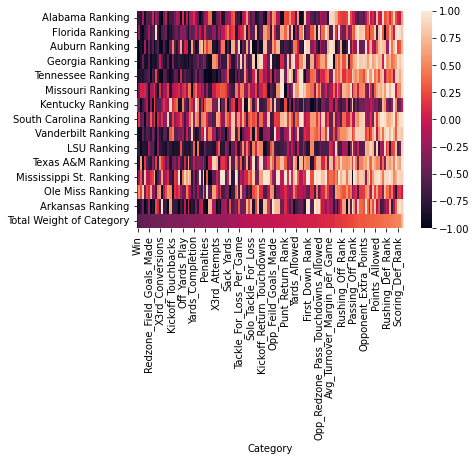

In [ ]:
sns.heatmap(sec_rankings)

In [ ]:
sec_avg = sec_average_rankings.copy()
sec_avg_rankings = sec_avg.set_index("Category")
sec_avg_rankings = sec_avg_rankings.transpose()
sec_avg_rankings

Category                 Win  Redzone_Scores  Opp_3rd_Attempt  X3rd_Percent  \
SEC Category Weight -0.75617       -0.544013        -0.508081     -0.493601   

Category             Opp_Pass_Attempts  Total_Points  \
SEC Category Weight          -0.483437     -0.479877   

Category             Redzone_Field_Goals_Made  Redzone_Attempts  \
SEC Category Weight                 -0.458765         -0.446601   

Category             Pass_Yards_Attempt  Off_Yards  Redzone_Points  \
SEC Category Weight           -0.423593  -0.419141        -0.40891   

Category             Feild_Goals  X3rd_Conversions  Opp_4th_Attempt       PAT  \
SEC Category Weight    -0.406282         -0.401676        -0.400494 -0.399153   

Category             Points_Per_Game  Off_Plays  Kickoff_Return_Yards  \
SEC Category Weight        -0.395568  -0.377976             -0.363659   

Category             Kickoff_Touchbacks  Tackle_for_Loss_Yards  Touchdowns  \
SEC Category Weight           -0.363659              -0.361656    -0.35581   

Category              Off_TDs  Pass_Yards  Assist_Tackle_For_Loss  \
SEC Category Weight -0.354574   -0.338563               -0.337036   

Category             Off_Yards_Play  Opp_Completions_Allowed  Pass_Touchdowns  \
SEC Category Weight       -0.334469                -0.326522        -0.323922   

Category             Def_Plays  Off_Yards_per_Game  Penalty_Yards  \
SEC Category Weight  -0.321542           -0.307155       -0.30587   

Category             Yards_Completion  Rushing_TD  Rush_Attempts  \
SEC Category Weight         -0.304352   -0.302416      -0.286631   

Category             Opp_Pass_Yds_Allowed  Total_Tackle_For_Loss  \
SEC Category Weight             -0.281186              -0.272841   

Category             Pass_Completions  Penalties  Redzone_Pass_TD  \
SEC Category Weight         -0.255617  -0.249875         -0.24714   

Category             Opp_First_Down_Penalties  First_Down_Penalties  \
SEC Category Weight                 -0.241373             -0.241373   

Category             Interceptions_Thrown_x  Interceptions_Thrown_y  \
SEC Category Weight               -0.238902               -0.238902   

Category             X3rd_Attempts  Rush_Yds  Pass_Yards_Per_Game  \
SEC Category Weight      -0.232762 -0.232623             -0.23077   

Category             Opp_First_Down_Passes  First_Down_Passes  \
SEC Category Weight              -0.230165          -0.230165   

Category             Redzone_Rush_TD  Sack_Yards  Opp_4th_Conversion  \
SEC Category Weight        -0.223417   -0.210272            -0.20847   

Category             Penalty_Yards_Per_Game  Penalty_Rank  Opp_3rd_Conversion  \
SEC Category Weight               -0.184875     -0.171413           -0.169366   

Category             Pass_Attempts  Tackle_For_Loss_Per_Game  Turnovers_Lost  \
SEC Category Weight      -0.154947                 -0.145763         -0.1431   

Category             Rushing_Yards_per_Game     Sacks  \
SEC Category Weight               -0.109782 -0.087955   

Category             Opp_Redzone_Field_Goals_Made  Yards_Rush  \
SEC Category Weight                     -0.081333   -0.079356   

Category             Solo_Tackle_For_Loss  Kickoffs_Returned  \
SEC Category Weight             -0.074885          -0.062665   

Category             Opp_Kickoff_Returns  Turnover_Rank  X4th_Down_Rank  \
SEC Category Weight            -0.062665      -0.062536       -0.059259   

Category             Opponent_Kickoff_Return_Yards  Kickoff_Return_Touchdowns  \
SEC Category Weight                      -0.056649                  -0.056649   

Category             Pass_Yards_Per_Game_Allowed  Pass_Def_Rank  \
SEC Category Weight                    -0.049249      -0.042258   

Category             Avg_Yards_Allowed_per_Punt_Return  \
SEC Category Weight                          -0.037151   

Category             Avg_Yards_Per_Punt_Return  Fumbles_Recovered  \
SEC Category Weight                  -0.037151          -0.033656   

Category             Opp_F

<AxesSubplot:xlabel='Category'>

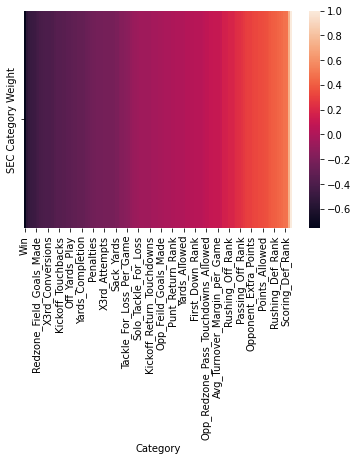

In [ ]:
sns.heatmap(sec_avg_rankings)

In [ ]:
big_ten = big_ten_rankings.copy()
big_ten = big_ten.set_index("Category")
big_ten = big_ten.transpose()
big_ten

Category                       Win  Total_Points  Touchdowns   Off_TDs  \
Michigan Ranking         -0.852803     -0.640331   -0.620959 -0.571247   
Ohio State Ranking       -0.870388     -0.813671   -0.803326 -0.830283   
Michigan State Ranking   -0.934353     -0.338019   -0.356943 -0.469530   
Wisconsin Ranking        -0.800641     -0.650222   -0.416622 -0.035875   
Nebraska Ranking         -0.924658     -0.012329   -0.083694 -0.138357   
Northwestern Ranking     -0.928654     -0.807810   -0.782847 -0.757734   
Indiana Ranking          -0.816497     -0.702145   -0.703526 -0.737865   
Illinois Ranking         -0.828079     -0.634350   -0.734667 -0.607258   
Rutgers Ranking          -0.927173     -0.871735   -0.879883 -0.979796   
Iowa Ranking              0.174078      0.865399    0.632456  0.610043   
Minnesota Ranking        -0.982708     -0.912515   -0.946680 -0.951430   
Maryland Ranking         -0.674200     -0.971454   -0.984732 -0.827837   
Penn State Ranking       -0.522233     -0.330272   -0.088950 -0.078268   
Purdue Ranking           -0.855236     -0.864019   -0.789777 -0.789777   
Total Weight of Category -0.767396     -0.548819   -0.540011 -0.511801   

Category                       PAT  Pass_Yards_Attempt  Opp_Pass_Attempts  \
Michigan Ranking         -0.529668           -0.899006          -0.150756   
Ohio State Ranking       -0.746586           -0.948820          -0.471345   
Michigan State Ranking   -0.583266            0.445019          -0.630465   
Wisconsin Ranking        -0.441250           -0.949445          -0.855579   
Nebraska Ranking         -0.646997            0.811299          -0.424160   
Northwestern Ranking     -0.741249           -0.731091          -0.810117   
Indiana Ranking          -0.406164           -0.976800          -0.872466   
Illinois Ranking         -0.662656           -0.707844           0.008655   
Rutgers Ranking          -0.979796            0.109380          -0.509462   
Iowa Ranking              0.714286            0.449439          -0.435517   
Minnesota Ranking        -0.950537           -0.871465          -0.106176   
Maryland Ranking         -0.406181           -0.884938           0.645919   
Penn State Ranking        0.065795           -0.786647          -0.812559   
Purdue Ranking           -0.683130           -0.793128          -0.993798   
Total Weight of Category -0.499814           -0.481003          -0.458416   

Category                  Redzone_Scores  Rush_Attempts  First_Down_Passes  \
Michigan Ranking               -0.518138      -0.244677          -0.200615   
Ohio State Ranking             -0.531494      -0.290211          -0.330230   
Michigan State Ranking         -0.572168      -0.847035          -0.499272   
Wisconsin Ranking              -0.592220      -0.852709          -0.276026   
Nebraska Ranking                0.244542      -0.192705          -0.100755   
Northwestern Ranking           -0.843278      -0.119059          -0.782589   
Indiana Ranking                -0.479632      -0.780569          -0.387657   
Illinois Ranking               -0.198680      -0.337177          -0.183147   
Rutgers Ranking                -0.905822       0.333717          -0.557514   
Iowa Ranking                    0.930949       0.226455          -0.889499   
Minnesota Ranking              -0.840121      -0.858951          -0.587047   
Maryland Ranking               -0.465242      -0.795307           0.639591   
Penn State Ranking             -0.424650      -0.674050          -0.876038   
Purdue Ranking                 -0.986928      -0.577936          -0.956469   
Total Weight of Category       -0.441634      -0.429301          -0.427662   

Category                  Opp_First_Down_Passes  Yards_Completion  Off_Plays  \
Michigan Ranking                      -0.200615         -0.207420  -0.296866   
Ohio State Ranking                    -0.330230         -0.952467  -0.708817   
Michigan State Ranking                -0.499272          0.765266  -0.836412   
Wisconsin Ran

Text(0.5, 1.0, 'Wins Influencing Rank')

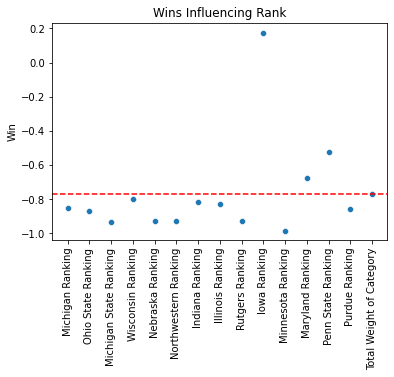

In [ ]:
wins = sns.scatterplot(x = big_ten.index, y = big_ten["Win"])
wins.axhline(y = big_ten["Win"].mean(), c='red', linestyle='dashed')
plt.xticks(rotation = 90)
plt.title("Wins Influencing Rank")


Text(0.5, 1.0, 'Losses Influencing Rank')

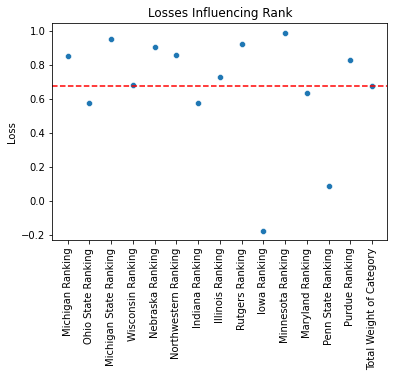

In [ ]:
losses = sns.scatterplot(x = big_ten.index, y = big_ten["Loss"])
losses.axhline(y = big_ten["Loss"].mean(), c='red', linestyle='dashed')
plt.xticks(rotation = 90)
plt.title("Losses Influencing Rank")

Text(0.5, 1.0, "Michigan's Leading Factors for a Higher Ranking in Big Ten East")

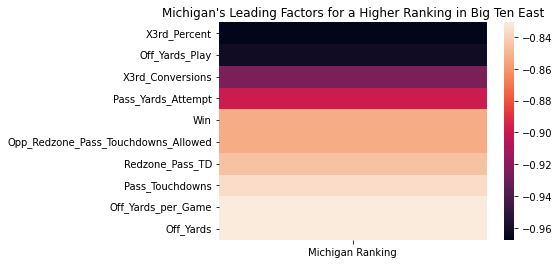

In [ ]:
umich_ranking_top_10 = umich_ranking_corr.head(10)
sns.heatmap(umich_ranking_top_10)
plt.title("Michigan's Leading Factors for a Higher Ranking in Big Ten East")

Text(0.5, 1.0, 'First Down Passes Influencing Rank')

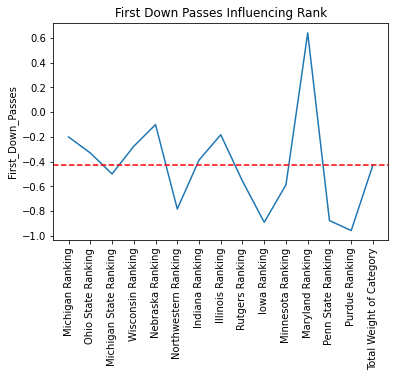

In [ ]:
first_down_passes = sns.lineplot(x = big_ten.index, y = big_ten["First_Down_Passes"])
first_down_passes.axhline(y = big_ten["First_Down_Passes"].mean(), c='red', linestyle='dashed')
plt.xticks(rotation = 90)
plt.title("First Down Passes Influencing Rank")

Text(0.5, 1.0, 'Offensive Rank Influencing Overall Rank in the Big Ten')

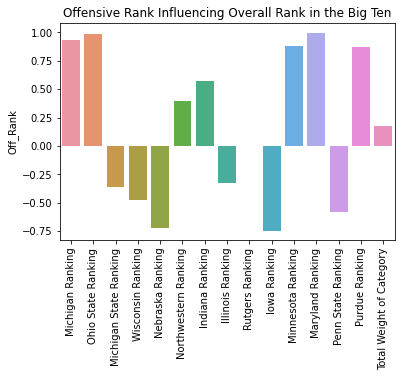

In [ ]:
sns.barplot(x = big_ten.index, y = big_ten["Off_Rank"])
plt.xticks(rotation = 90)
plt.title("Offensive Rank Influencing Overall Rank in the Big Ten")

Text(0.5, 1.0, 'Defensive Rank Influencing Overall Rank in the Big Ten')

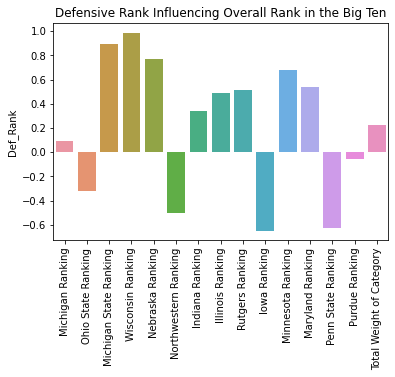

In [ ]:
sns.barplot(x = big_ten.index, y = big_ten["Def_Rank"])
plt.xticks(rotation = 90)
plt.title("Defensive Rank Influencing Overall Rank in the Big Ten")

In [ ]:
# sec_avg_rankings
# big_ten_average_rankings
# two dataframes that will help find the most influential variables for their rankings
big_ten_weight = big_ten_average_rankings.copy()
sec_weight = sec_average_rankings.copy()
# big_ten_weight= big_ten_weight.rename(index={1: "B10_weight"})
big_ten_weight = big_ten_weight.rename(columns={"Big Ten Category Weight": "B10_weight"})
sec_weight = sec_weight.rename(columns={"SEC Category Weight": "SEC_weight"})

big_ten_weight['B10_weight']= abs(big_ten_weight['B10_weight'])
big_ten_weight = big_ten_weight.sort_values(by=['B10_weight'], ascending = False)
big_ten_weight = big_ten_weight.Category[:21].tolist()
big_ten_weight


['Ranking',
 'Win',
 'Loss',
 'Total_Points',
 'Touchdowns',
 'Off_TDs',
 'PAT',
 'Pass_Yards_Attempt',
 'Opp_Pass_Attempts',
 'Scoring_Off_Rank',
 'Redzone_Scores',
 'Rushing_Def_Rank',
 'Rush_Attempts',
 'Opp_First_Down_Passes',
 'First_Down_Passes',
 'Yards_Completion',
 'Off_Plays',
 'Redzone_Attempts',
 'Avg_Points_per_Game_Allowed',
 'X3rd_Down_Def_Rank',
 'Off_Yards']

In [ ]:
sec_weight['SEC_weight']= abs(sec_weight['SEC_weight'])
sec_weight = sec_weight.sort_values(by=['SEC_weight'], ascending = False)
sec_weight = sec_weight.Category[:21].tolist()
sec_weight

['Ranking',
 'Win',
 'Loss',
 'Redzone.Scores',
 'Opp.3rd.Attempt',
 'X3rd.Percent',
 'Opp.Pass.Attempts',
 'Total.Points',
 'Avg.Points.per.Game.Allowed',
 'Scoring.Def.Rank',
 'X3rd.Down.Rank',
 'Redzone.Field.Goals.Made',
 'X4th.Conversions',
 'Redzone.Attempts',
 'Yds.Rush.Allowed',
 'Def.Rank',
 'Pass.Yards.Attempt',
 'Off.Yards',
 'Rush.Yards.Per.Game.Allowed',
 'Rushing.Def.Rank',
 'Redzone.Points']

In [ ]:
list_difference = [item for item in sec_weight if item not in big_ten_weight]

print(list_difference)
# list of variables that affect SEC but not B10

['Opp.3rd.Attempt', 'X3rd.Percent', 'Scoring.Def.Rank', 'X3rd.Down.Rank', 'Redzone.Field.Goals.Made', 'X4th.Conversions', 'Yds.Rush.Allowed', 'Def.Rank', 'Rush.Yards.Per.Game.Allowed', 'Redzone.Points']


In [ ]:
list_difference = [item for item in big_ten_weight if item not in sec_weight]

print(list_difference)
# list of variables that affect B10 but not SEC

['Touchdowns', 'Off.TDs', 'PAT', 'Scoring.Off.Rank', 'Rush.Attempts', 'Opp.First.Down.Passes', 'First.Down.Passes', 'Yards.Completion', 'Off.Plays', 'X3rd.Down.Def.Rank']


In [ ]:
conference = pd.merge(sec_average_rankings, big_ten_average_rankings)
conference_transpose = conference.copy()
conference_transpose = conference_transpose.set_index("Category")
conference_transpose = sec_avg_rankings.transpose()

Category  SEC Category Weight  \
0                                     Win            -0.756170   
1                          Redzone.Scores            -0.544013   
2                         Opp.3rd.Attempt            -0.508081   
3                            X3rd.Percent            -0.493601   
4                       Opp.Pass.Attempts            -0.483437   
5                            Total.Points            -0.479877   
6                Redzone.Field.Goals.Made            -0.458765   
7                        Redzone.Attempts            -0.446601   
8                      Pass.Yards.Attempt            -0.423593   
9                               Off.Yards            -0.419141   
10                         Redzone.Points            -0.408910   
11                            Feild.Goals            -0.406282   
12                       X3rd.Conversions            -0.401676   
13                        Opp.4th.Attempt            -0.400494   
14                                    PAT            -0.399153   
15                        Points.Per.Game            -0.395568   
16                              Off.Plays            -0.377976   
17                   Kickoff.Return.Yards            -0.363659   
18                     Kickoff.Touchbacks            -0.363659   
19                  Tackle.for.Loss.Yards            -0.361656   
20                             Touchdowns            -0.355810   
21                                Off.TDs            -0.354574   
22                             Pass.Yards            -0.338563   
23                 Assist.Tackle.For.Loss            -0.337036   
24                         Off.Yards.Play            -0.334469   
25                Opp.Completions.Allowed            -0.326522   
26                        Pass.Touchdowns            -0.323922   
27                              Def.Plays            -0.321542   
28                     Off.Yards.per.Game            -0.307155   
29                          Penalty.Yards            -0.305870   
30                       Yards.Completion            -0.304352   
31                             Rushing.TD            -0.302416   
32                          Rush.Attempts            -0.286631   
33                   Opp.Pass.Yds.Allowed            -0.281186   
34                  Total.Tackle.For.Loss            -0.272841   
35                       Pass.Completions            -0.255617   
36                              Penalties            -0.249875   
37                        Redzone.Pass.TD            -0.247140   
38               Opp.First.Down.Penalties            -0.241373   
39                   First.Down.Penalties            -0.241373   
40                 Interceptions.Thrown.x            -0.238902   
41                 Interceptions.Thrown.y            -0.238902   
42                          X3rd.Attempts            -0.232762   
43                               Rush.Yds            -0.232623   
44                    Pass.Yards.Per.Game            -0.230770   
45                  Opp.First.Down.Passes            -0.230165   
46                      First.Down.Passes            -0.230165   
47                        Redzone.Rush.TD            -0.223417   
48                             Sack.Yards            -0.210272   
49                     Opp.4th.Conversion            -0.208470   
50                 Penalty.Yards.Per.Game            -0.184875   
51                           Penalty.Rank            -0.171413   
52                     Opp.3rd.Conversion            -0.169366   
53                          Pass.Attempts            -0.154947   
54               Tackle.For.Loss.Per.Game            -0.145763   
55                         Turnovers.Lost            -0.143100   
56                 Rushing.Yards.per.Game            -0.109782   
57                                  Sacks            -0.087955   
58           Opp.Redzone.Field.Goals.Made            -0.081333   
59                             Yards.Rush            -0.079356   
60     

In [ ]:
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats


In [ ]:
sec_rankings_stats = sec_rankings.copy()
sec_rankings_stats = sec_rankings_stats.reset_index()
sec_rankings_stats = sec_rankings_stats.rename(columns = {'index':'Team'})
sec_rankings_stats['Conference'] = 'SEC'
sec_rankings_stats

Category                      Team       Win  Redzone_Scores  Opp_3rd_Attempt  \
0                  Alabama Ranking -0.816497       -0.706063        -0.793145   
1                  Florida Ranking -0.866578       -0.333028        -0.888599   
2                   Auburn Ranking -0.852803       -0.996928        -0.826543   
3                  Georgia Ranking -0.925820       -0.998115        -0.829943   
4                Tennessee Ranking -0.916968       -0.837266        -0.783037   
5                 Missouri Ranking -0.878310       -0.400862         0.059587   
6                 Kentucky Ranking  0.000000       -0.450835        -0.958580   
7           South Carolina Ranking -0.888205        0.142034        -0.546296   
8               Vanderbilt Ranking -0.866025       -0.936722        -0.924007   
9                      LSU Ranking -0.787839       -0.711456        -0.965540   
10               Texas A&M Ranking -1.000000       -0.766131         0.587949   
11         Mississippi St. Ranking -0.870388       -0.264820         0.292334   
12                Ole Miss Ranking  0.000000        0.513436         0.210877   
13                Arkansas Ranking -0.916949       -0.869428        -0.748190   
14        Total Weight of Category -0.756170       -0.544013        -0.508081   

Category  X3rd_Percent  Opp_Pass_Attempts  Total_Points  \
0            -0.154096          -0.905942     -0.559303   
1            -0.970605          -0.704762     -0.579284   
2            -0.988734          -0.117999     -0.887470   
3            -0.490040          -0.860430     -0.885014   
4            -0.828324          -0.717574     -0.628793   
5             0.037915           0.074178     -0.262154   
6            -0.647298          -0.455473     -0.060589   
7            -0.433471          -0.963465     -0.291018   
8            -0.488055          -0.790109     -0.583727   
9            -0.791032          -0.807356     -0.840637   
10           -0.970143           0.172169     -0.475494   
11           -0.590440           0.781305     -0.092587   
12            0.834595          -0.493464      0.222069   
13           -0.430691          -0.979199     -0.794282   
14           -0.493601          -0.483437     -0.479877   

Category  Redzone_Field_Goals_Made  Redzone_Attempts  Pass_Yards_Attempt  \
0                        -0.596285         -0.544949            0.075247   
1                        -0.192450         -0.671028           -0.523267   
2                        -0.444750         -0.791257           -0.555586   
3                        -0.577350         -0.940875           -0.836465   
4                        -0.546054         -0.952938           -0.612404   
5                        -0.852803         -0.199502           -0.135542   
6                        -0.915249         -0.174078           -0.951486   
7                        -0.477396          0.321860           -0.299215   
8                        -0.624851         -0.792952           -0.367693   
9                        -0.198030         -0.539238           -0.525615   
10                       -0.707107         -0.782725           -0.229652   
11                       -0.145741          0.103833            0.185377   
12                        0.080845          0.668043           -0.306072   
13                       -0.225494         -0.956607           -0.847926   
14                       -0.458765         -0.446601           -0.423593   

Category  Off_Yards  Redzone_Points  Feild_Goals  X3rd_Conversions  \
0         -0.760868       -0.225069    -0.393919         -0.882231   
1         -0.639024        0.932944    -0.660827         -0.954291   
2         -0.924058       -0.716471    -0.571429         -0.980940   
3         -0.854391       -0.864422    -0.617213          0.000000   
4         -0.796136        0.242140    -0.642271         -0.937192   
5          0.134419       -0.545746    -0.855921          0.120775   
6          0.242975       -0.584734    -0.531494   

In [ ]:
big_ten_rankings_stats = big_ten.copy()
big_ten_rankings_stats = big_ten_rankings_stats.reset_index()
big_ten_rankings_stats = big_ten_rankings_stats.rename(columns = {'index':'Team'})
big_ten_rankings_stats['Conference'] = 'Big Ten'
big_ten_rankings_stats

Category                      Team       Win  Total_Points  Touchdowns  \
0                 Michigan Ranking -0.852803     -0.640331   -0.620959   
1               Ohio State Ranking -0.870388     -0.813671   -0.803326   
2           Michigan State Ranking -0.934353     -0.338019   -0.356943   
3                Wisconsin Ranking -0.800641     -0.650222   -0.416622   
4                 Nebraska Ranking -0.924658     -0.012329   -0.083694   
5             Northwestern Ranking -0.928654     -0.807810   -0.782847   
6                  Indiana Ranking -0.816497     -0.702145   -0.703526   
7                 Illinois Ranking -0.828079     -0.634350   -0.734667   
8                  Rutgers Ranking -0.927173     -0.871735   -0.879883   
9                     Iowa Ranking  0.174078      0.865399    0.632456   
10               Minnesota Ranking -0.982708     -0.912515   -0.946680   
11                Maryland Ranking -0.674200     -0.971454   -0.984732   
12              Penn State Ranking -0.522233     -0.330272   -0.088950   
13                  Purdue Ranking -0.855236     -0.864019   -0.789777   
14        Total Weight of Category -0.767396     -0.548819   -0.540011   

Category   Off_TDs       PAT  Pass_Yards_Attempt  Opp_Pass_Attempts  \
0        -0.571247 -0.529668           -0.899006          -0.150756   
1        -0.830283 -0.746586           -0.948820          -0.471345   
2        -0.469530 -0.583266            0.445019          -0.630465   
3        -0.035875 -0.441250           -0.949445          -0.855579   
4        -0.138357 -0.646997            0.811299          -0.424160   
5        -0.757734 -0.741249           -0.731091          -0.810117   
6        -0.737865 -0.406164           -0.976800          -0.872466   
7        -0.607258 -0.662656           -0.707844           0.008655   
8        -0.979796 -0.979796            0.109380          -0.509462   
9         0.610043  0.714286            0.449439          -0.435517   
10       -0.951430 -0.950537           -0.871465          -0.106176   
11       -0.827837 -0.406181           -0.884938           0.645919   
12       -0.078268  0.065795           -0.786647          -0.812559   
13       -0.789777 -0.683130           -0.793128          -0.993798   
14       -0.511801 -0.499814           -0.481003          -0.458416   

Category  Redzone_Scores  Rush_Attempts  First_Down_Passes  \
0              -0.518138      -0.244677          -0.200615   
1              -0.531494      -0.290211          -0.330230   
2              -0.572168      -0.847035          -0.499272   
3              -0.592220      -0.852709          -0.276026   
4               0.244542      -0.192705          -0.100755   
5              -0.843278      -0.119059          -0.782589   
6              -0.479632      -0.780569          -0.387657   
7              -0.198680      -0.337177          -0.183147   
8              -0.905822       0.333717          -0.557514   
9               0.930949       0.226455          -0.889499   
10             -0.840121      -0.858951          -0.587047   
11             -0.465242      -0.795307           0.639591   
12             -0.424650      -0.674050          -0.876038   
13             -0.986928      -0.577936          -0.956469   
14             -0.441634      -0.429301          -0.427662   

Category  Opp_First_Down_Passes  Yards_Completion  Off_Plays  \
0                     -0.200615         -0.207420  -0.296866   
1                     -0.330230         -0.952467  -0.708817   
2                     -0.499272          0.765266  -0.836412   
3                     -0.276026         -0.513162  -0.970891   
4                     -0.100755         -0.697145  -0.726779   
5                     -0.782589         -0.567137  -0.905310   
6                     -0.387657         -0.940220  -0.604077   
7                     -0.183147         -0.246370  -0.548097   
8                     -0.557514         -0.061928   0.678127   
9                     -0.889499          0.16

In [ ]:
sec_big_ten = pd.concat([sec_rankings_stats, big_ten_rankings_stats])
sec_big_ten = sec_big_ten.reset_index()
sec_big_ten = sec_big_ten.drop(columns = ["index"])
sec_big_ten = sec_big_ten.drop(14)
sec_big_ten = sec_big_ten.drop(29)
sec_big_ten = sec_big_ten.reset_index()

In [ ]:
sec_big_ten = sec_big_ten.drop(columns = ["index"])

In [ ]:
lm = ols('Total_Points ~ Conference', data = sec_big_ten).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Total_Points   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.1884
Date:                Wed, 01 Dec 2021   Prob (F-statistic):              0.668
Time:                        02:27:33   Log-Likelihood:                -14.418
No. Observations:                  28   AIC:                             32.84
Df Residuals:                      26   BIC:                             35.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.5488      0.112     -4.887      0.000      -0.780      -0.318
Conference[T.SEC]     0.0689      0.159      0.434      0.668      -0.258       0.395
==============================================================================
Omnibus:                       18.661   Durbin-Watson:                   2.253
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.349
Skew:                           1.640   Prob(JB):                     8.51e-06
Kurtosis:                       6.043   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
table = sm.stats.anova_lm(sec_big_ten, typ = 2)
table

AttributeError: 'DataFrame' object has no attribute 'model'

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e5015641-4d35-4402-b683-0c8b8a224cdc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>